# Credit Risk Assessment: Comprehensive Data Mining Analysis
This notebook includes:
- Data Description
- Preliminary Analysis
- Data Preprocessing
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Modeling (Logistic Regression, Decision Tree, Random Forest, SVM)
- Model Evaluation (Confusion Matrix, Classification Report, ROC Curve, Cross-validation)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.linear_model import LassoCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)
from sklearn.model_selection import StratifiedKFold, cross_val_score

df = pd.read_csv("C:/All Data/Studies/Msc Rutgers/Semester 2/Data Mining/Project/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [15]:
# Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [16]:
# Statistical Overview
df.describe(include='all')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [17]:
# Missing values percentage
df.isnull().mean() * 100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [18]:
# Preprocessing steps: handling missing values and encoding
df.dropna(inplace=True)
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y':1, 'N':0})
df = pd.get_dummies(df, columns=['person_home_ownership','loan_intent','loan_grade'], drop_first=True)
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,35000,16.02,1,0.59,1,3,False,...,False,False,True,False,False,False,True,False,False,False
1,21,9600,5.0,1000,11.14,0,0.10,0,2,False,...,False,False,False,False,True,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,0,3,False,...,False,True,False,False,False,True,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,0,2,False,...,False,True,False,False,False,True,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,1,4,False,...,False,True,False,False,False,True,False,False,False,False


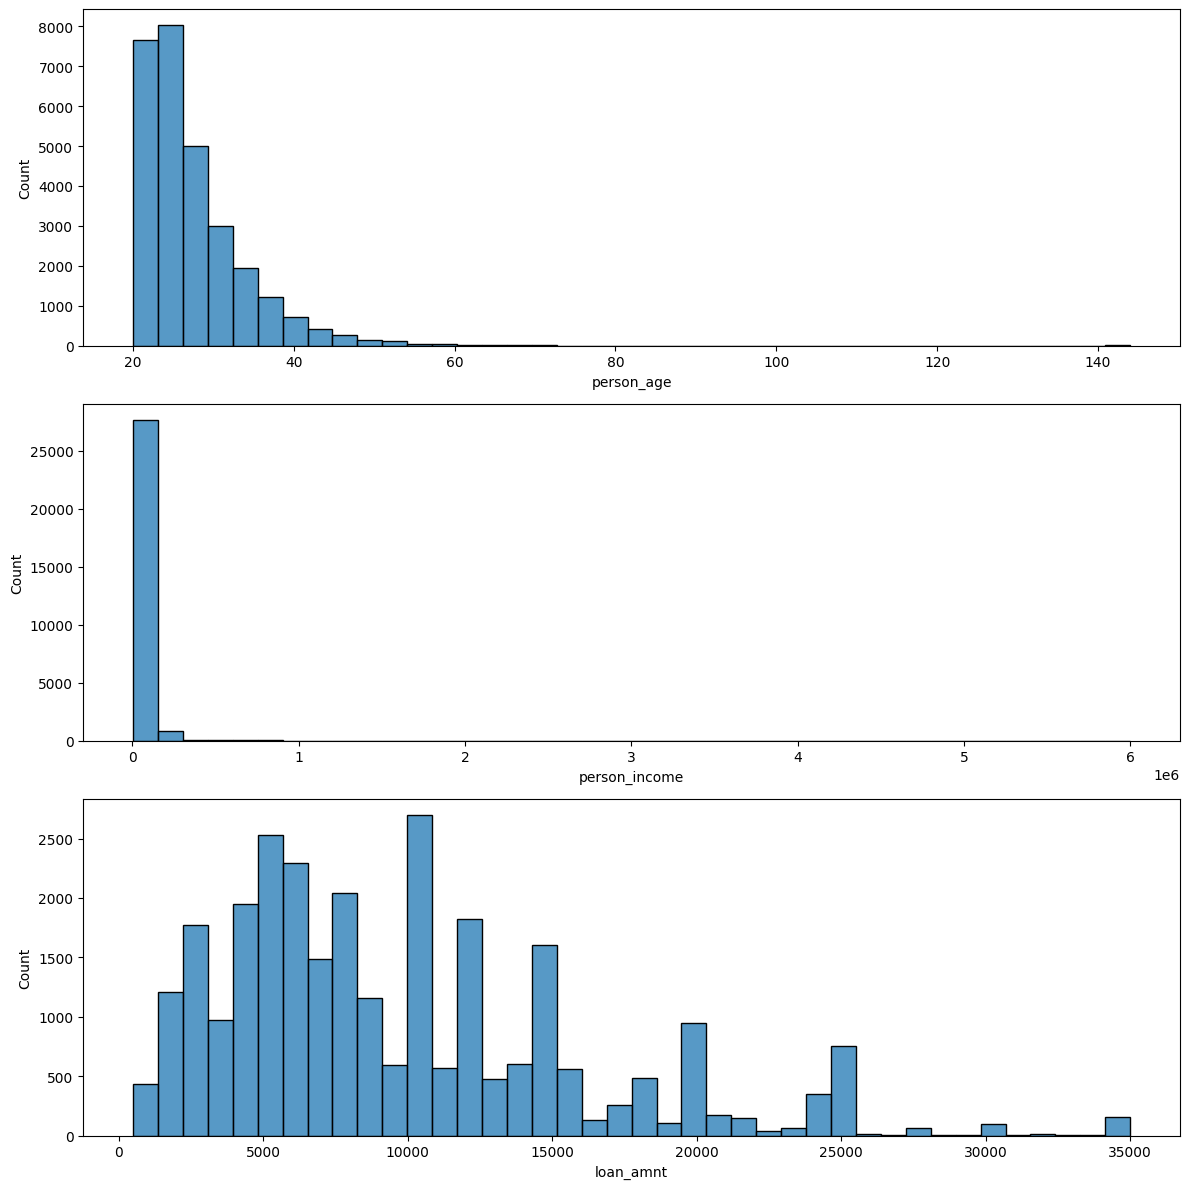

In [19]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
sns.histplot(df['person_age'], bins=40, ax=axes[0])
sns.histplot(df['person_income'], bins=40, ax=axes[1])
sns.histplot(df['loan_amnt'], bins=40, ax=axes[2])
plt.tight_layout()
plt.show()

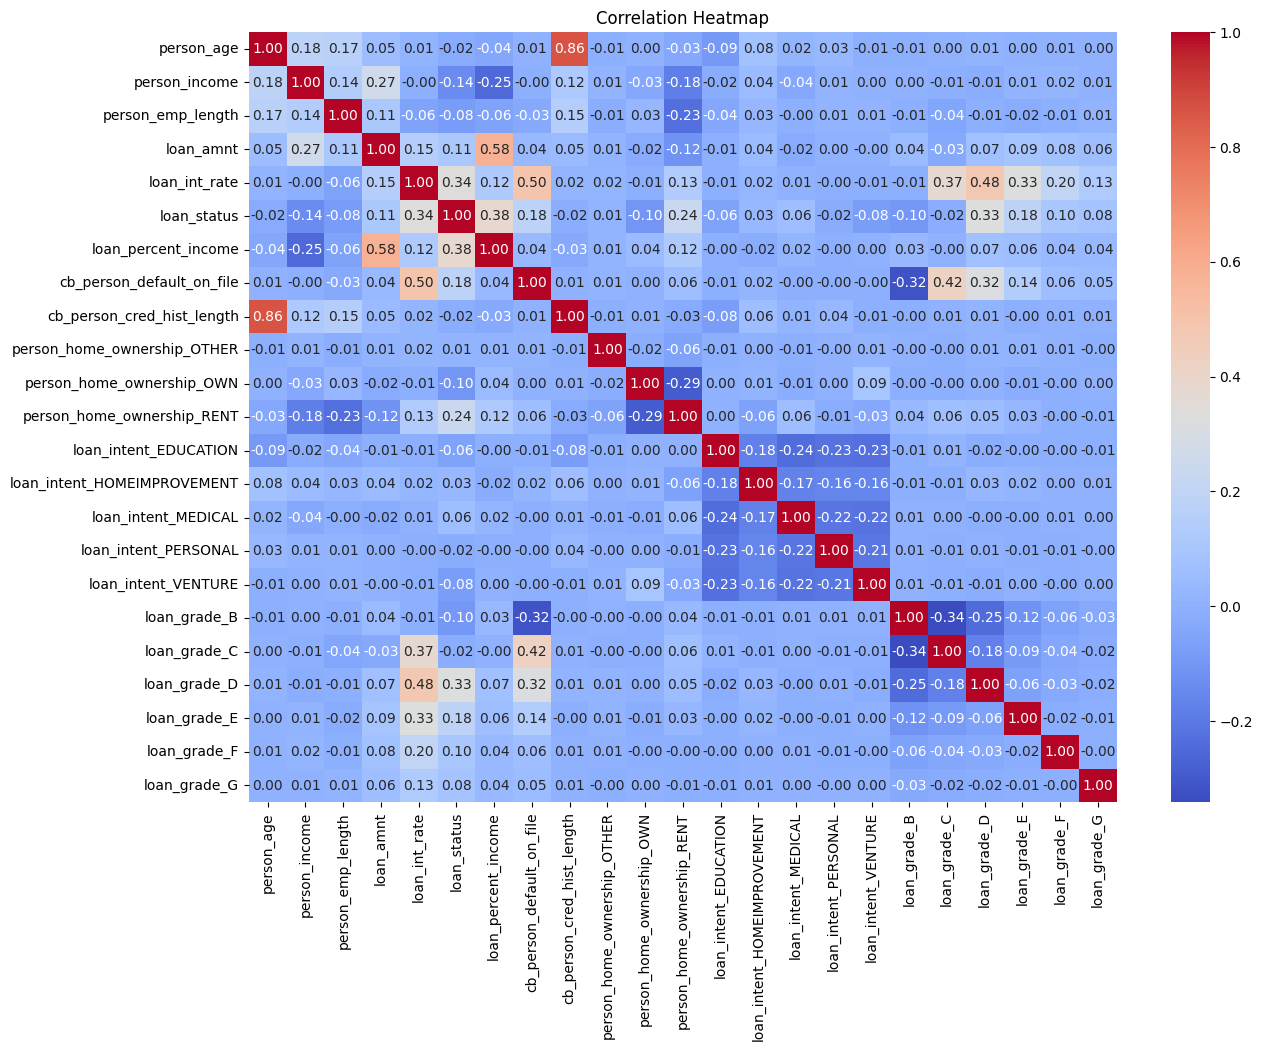

In [20]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## EDA

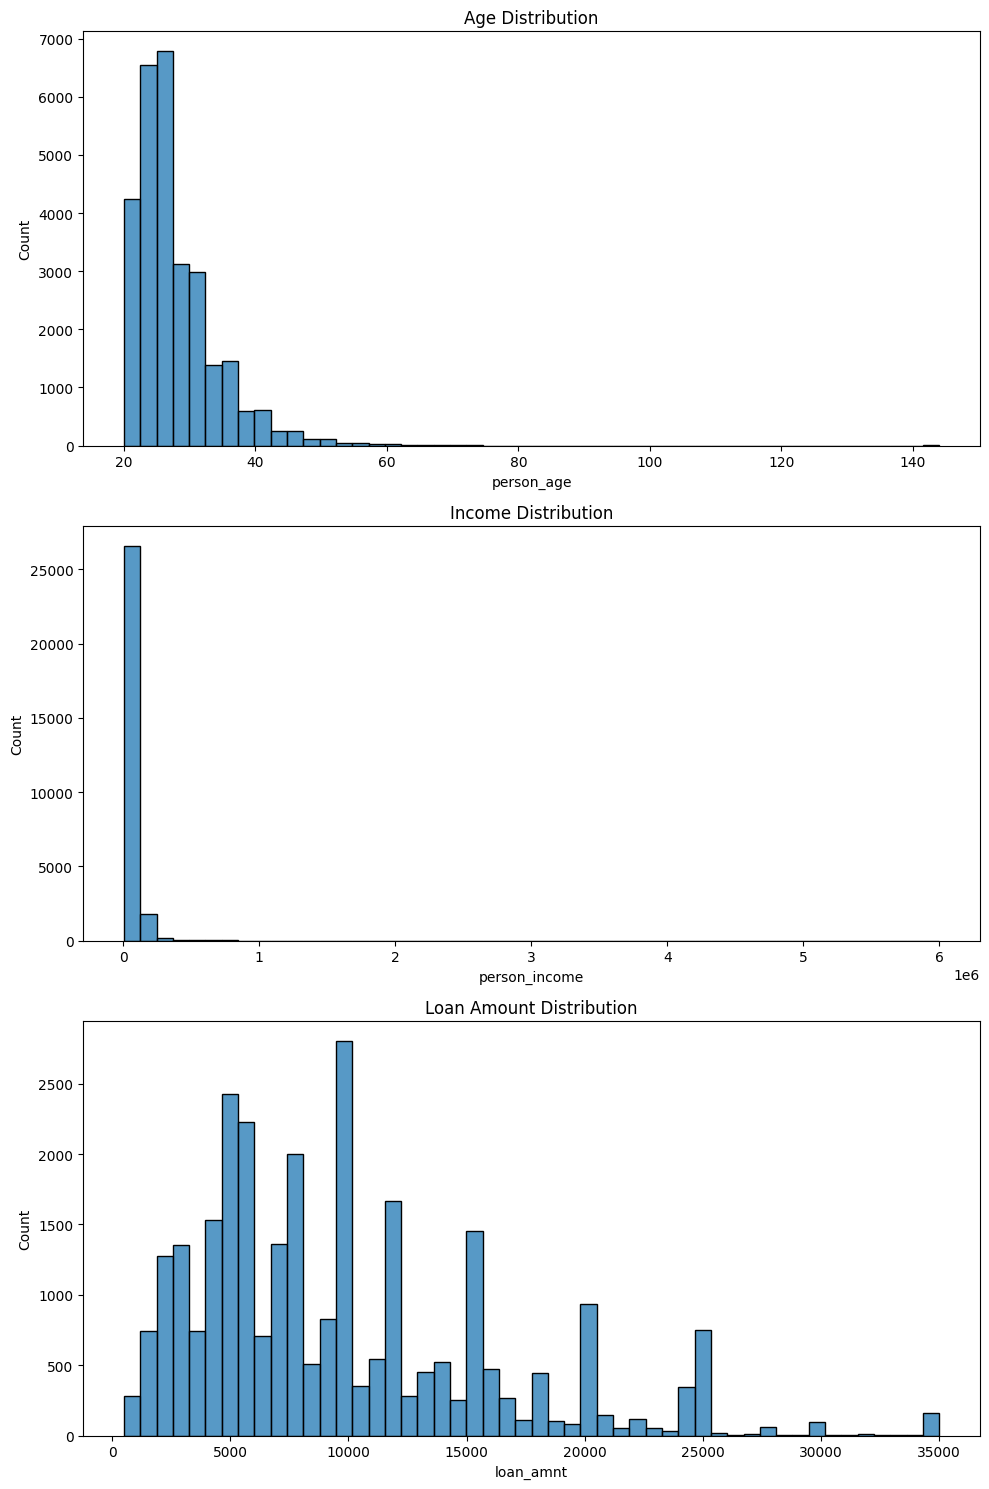

person_age                     0.0
person_income                  0.0
person_emp_length              0.0
loan_amnt                      0.0
loan_int_rate                  0.0
loan_status                    0.0
loan_percent_income            0.0
cb_person_default_on_file      0.0
cb_person_cred_hist_length     0.0
person_home_ownership_OTHER    0.0
person_home_ownership_OWN      0.0
person_home_ownership_RENT     0.0
loan_intent_EDUCATION          0.0
loan_intent_HOMEIMPROVEMENT    0.0
loan_intent_MEDICAL            0.0
loan_intent_PERSONAL           0.0
loan_intent_VENTURE            0.0
loan_grade_B                   0.0
loan_grade_C                   0.0
loan_grade_D                   0.0
loan_grade_E                   0.0
loan_grade_F                   0.0
loan_grade_G                   0.0
dtype: float64

In [21]:
# Checking missing values percentage
missing_percentage = df.isnull().mean() * 100

# Distribution plots for key numerical variables
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(df['person_age'], bins=50, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(df['person_income'], bins=50, ax=axes[1])
axes[1].set_title('Income Distribution')

sns.histplot(df['loan_amnt'], bins=50, ax=axes[2])
axes[2].set_title('Loan Amount Distribution')

plt.tight_layout()
plt.show()

missing_percentage

C:\Users\20200\AppData\Local\Temp\ipykernel_55552\725491693.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
C:\Users\20200\AppData\Local\Temp\ipykernel_55552\725491693.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)


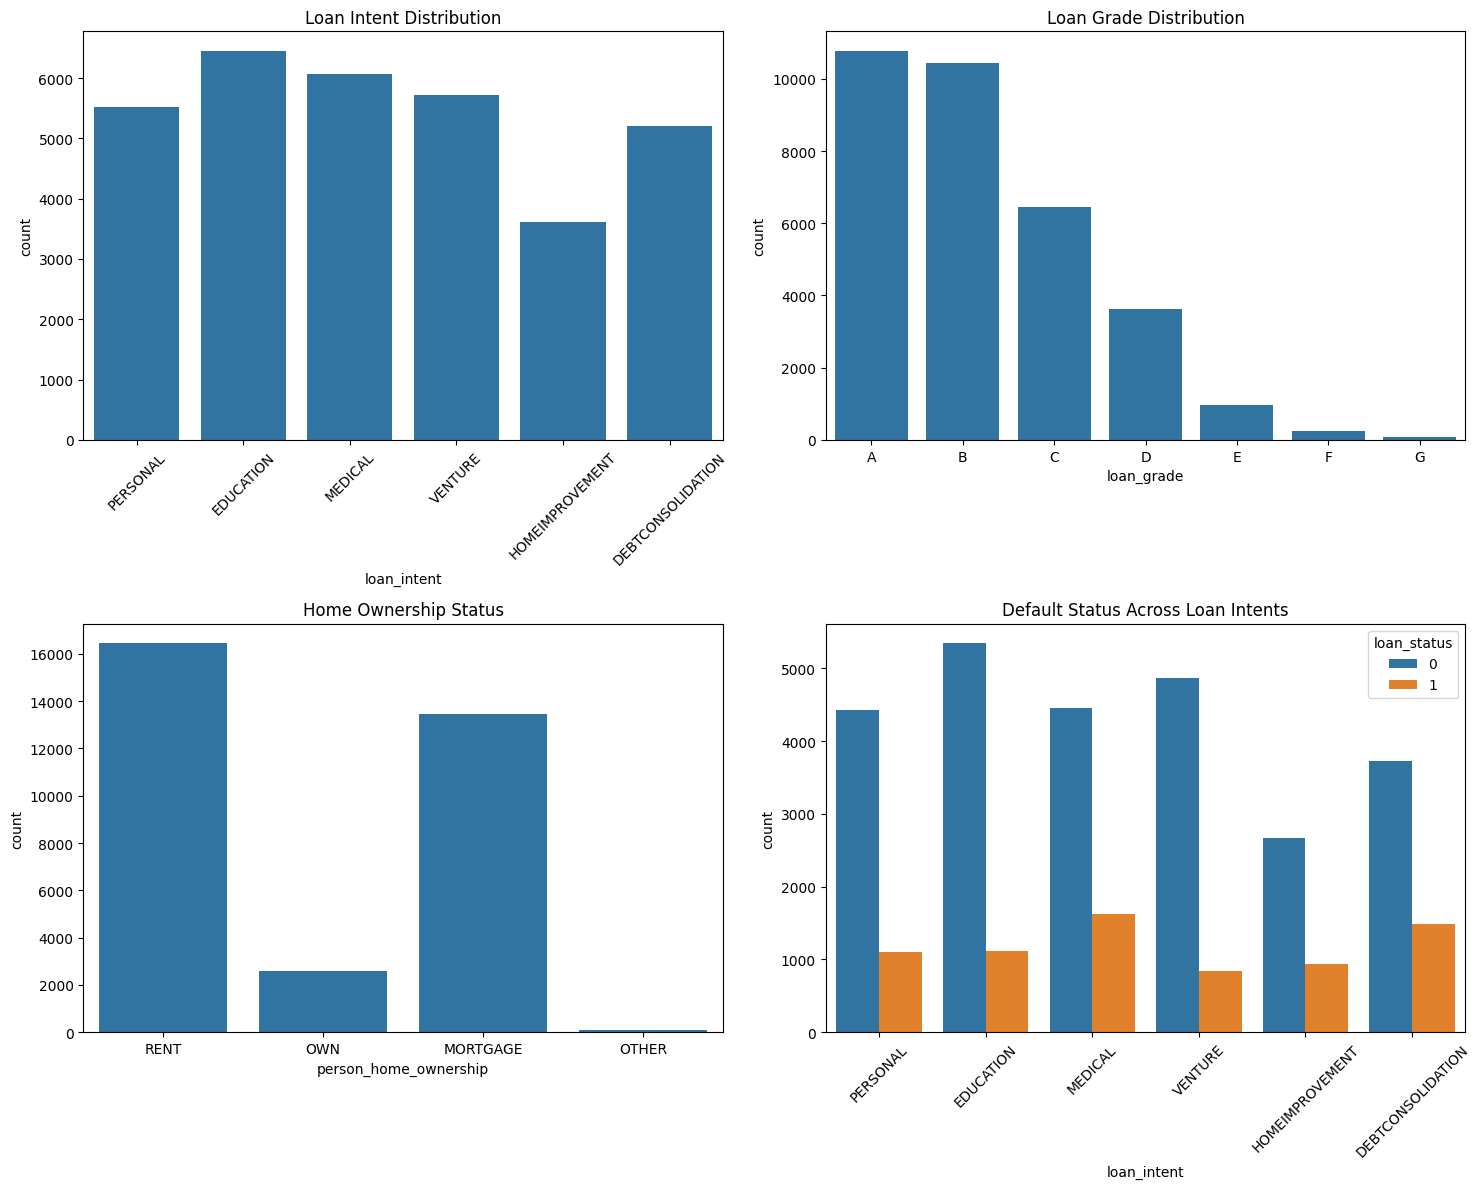

In [22]:
df_raw = pd.read_csv("C:/All Data/Studies/Msc Rutgers/Semester 2/Data Mining/Project/credit_risk_dataset.csv")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Loan intent distribution
sns.countplot(data=df_raw, x='loan_intent', ax=axes[0, 0])
axes[0, 0].set_title('Loan Intent Distribution')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Loan grade distribution
sns.countplot(data=df_raw, x='loan_grade', order=sorted(df_raw['loan_grade'].unique()), ax=axes[0, 1])
axes[0, 1].set_title('Loan Grade Distribution')

# Home ownership distribution
sns.countplot(data=df_raw, x='person_home_ownership', ax=axes[1, 0])
axes[1, 0].set_title('Home Ownership Status')

# Default status distribution across loan intents
sns.countplot(data=df_raw, x='loan_intent', hue='loan_status', ax=axes[1, 1])
axes[1, 1].set_title('Default Status Across Loan Intents')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [23]:
print(df.columns.tolist())


['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G']


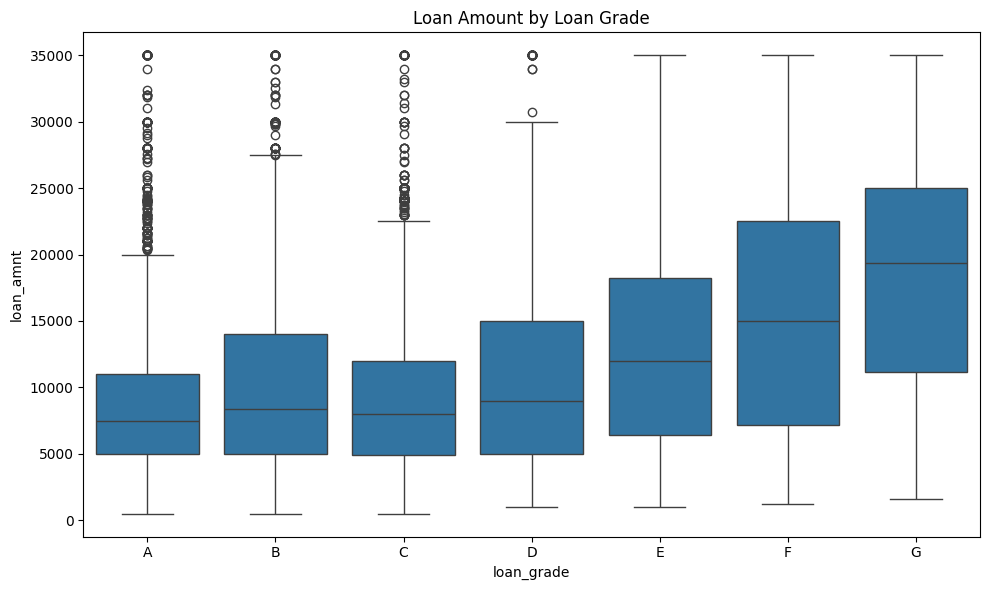

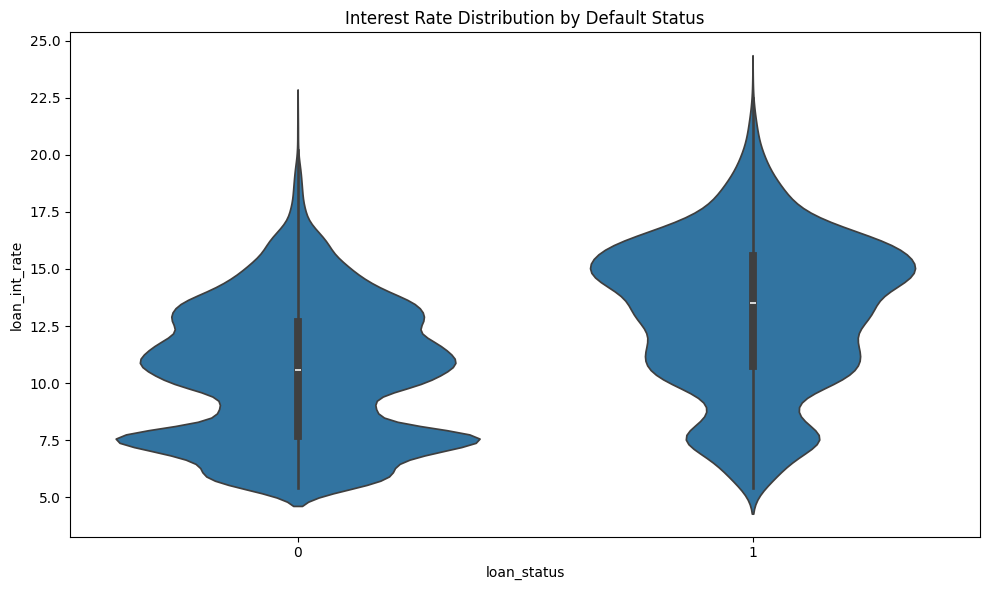

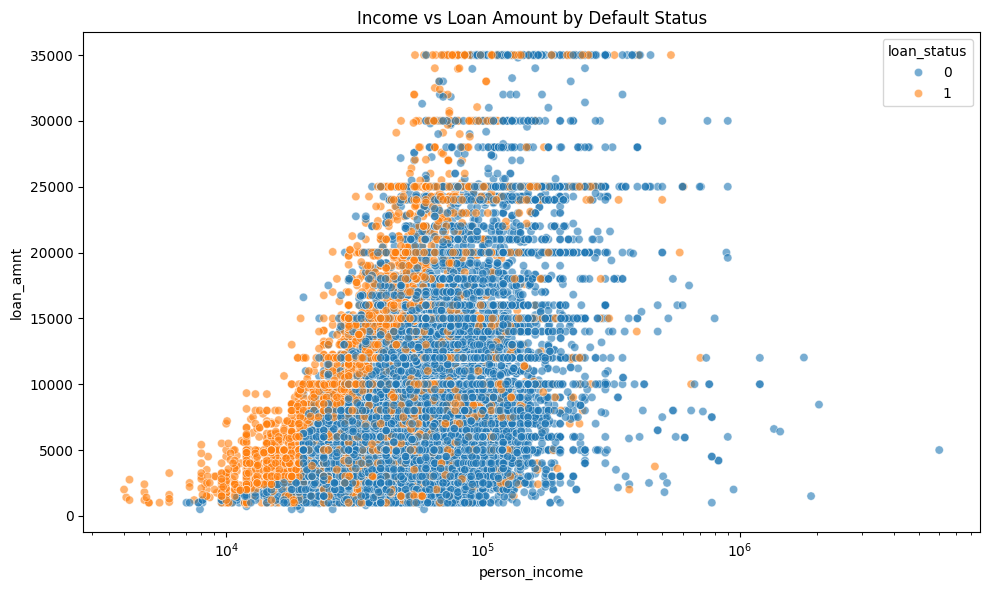

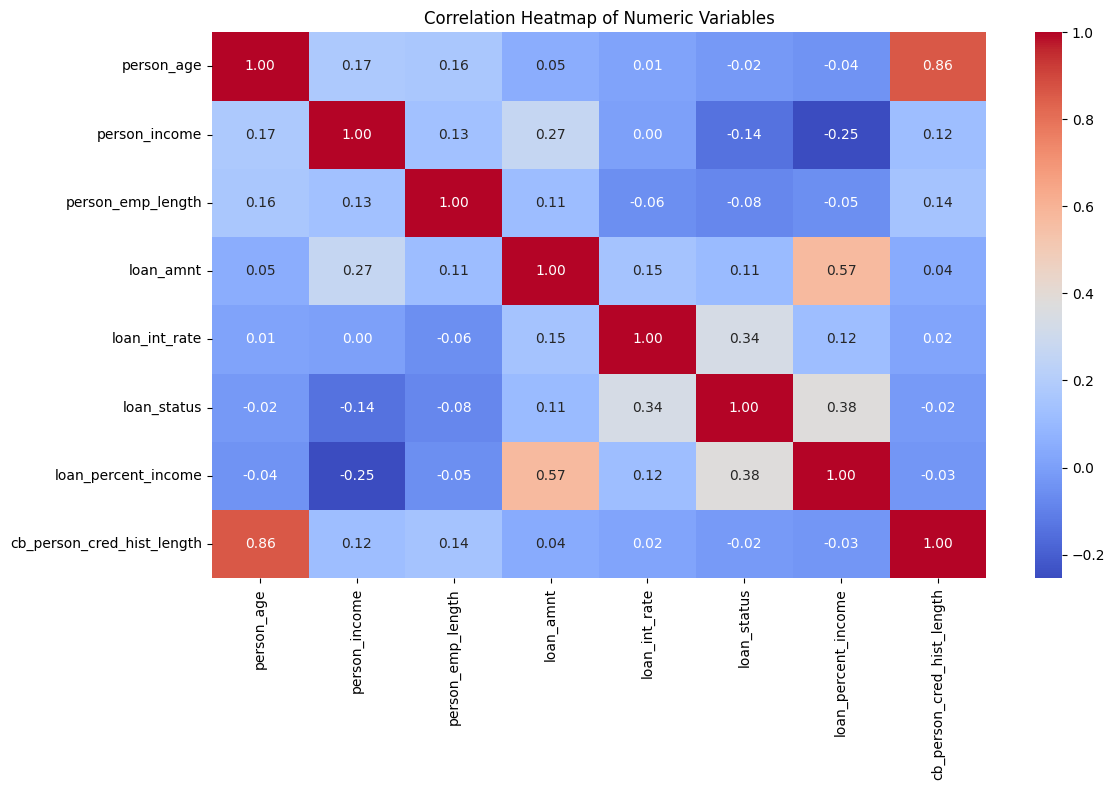

In [24]:
# Additional complex analysis plots

# Boxplot for loan amount vs loan grade to observe differences
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_raw, x='loan_grade', y='loan_amnt', order=sorted(df_raw['loan_grade'].unique()))
plt.title('Loan Amount by Loan Grade')
plt.tight_layout()
plt.show()

# Violin plot for interest rate distribution across default status
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_raw, x='loan_status', y='loan_int_rate')
plt.title('Interest Rate Distribution by Default Status')
plt.tight_layout()
plt.show()

# Scatter plot for person_income vs loan_amnt colored by default status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_raw, x='person_income', y='loan_amnt', hue='loan_status', alpha=0.6)
plt.title('Income vs Loan Amount by Default Status')
plt.xscale('log')  # log scale for clarity due to wide income range
plt.tight_layout()
plt.show()

# Heatmap for correlations between numeric variables
numeric_corr = df_raw.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

C:\Users\20200\AppData\Local\Temp\ipykernel_55552\586275977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['cb_person_default_on_file'] = data_model['cb_person_default_on_file'].map({'Y':1, 'N':0})


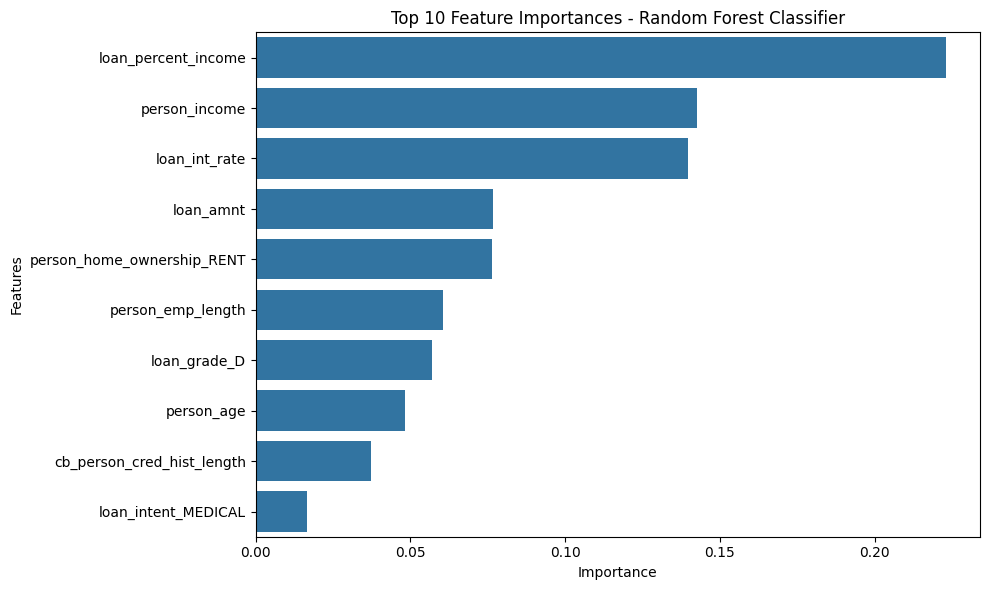

In [25]:
# Preprocessing for modeling
data_model = df_raw.dropna()
data_model['cb_person_default_on_file'] = data_model['cb_person_default_on_file'].map({'Y':1, 'N':0})
data_model = pd.get_dummies(data_model, columns=['person_home_ownership', 'loan_intent', 'loan_grade'], drop_first=True)

# Features and target
X = data_model.drop('loan_status', axis=1)
y = data_model['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]


# Feature Importance
importances = clf.feature_importances_
indices = importances.argsort()[::-1][:10]  # Top 10 features

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Top 10 Feature Importances - Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


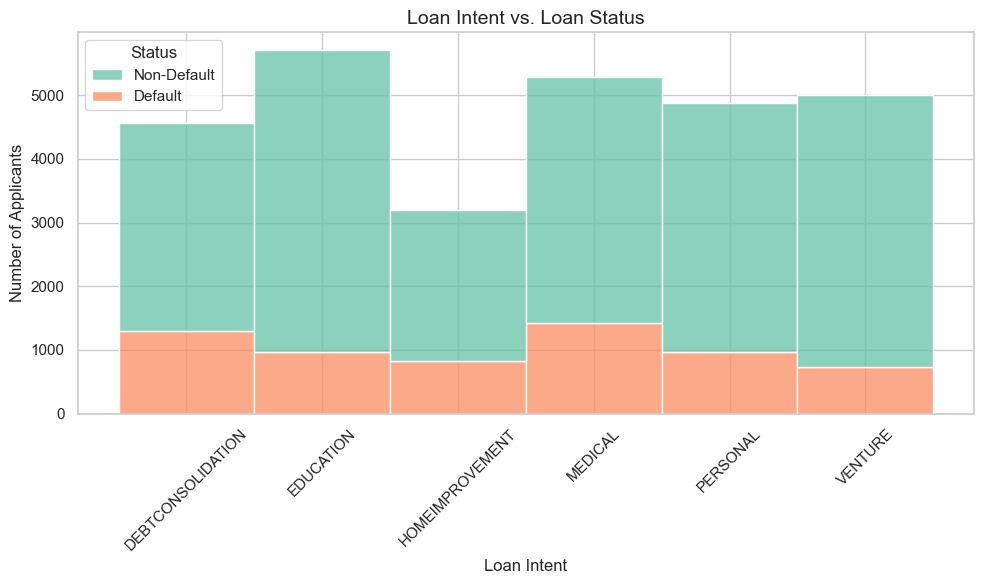

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set_theme(style="whitegrid")  # Options: whitegrid, darkgrid, white, dark, ticks

# Load dataset
df = pd.read_csv("credit_risk_dataset.csv")
df.columns = df.columns.str.strip()
df = df.dropna()

# Group by loan intent and status
intent_status_group = (
    df.groupby(["loan_intent"])["loan_status"]
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
    .rename(columns={0: "Non-Default", 1: "Default"})
)

# Melt the DataFrame for stacked plotting
intent_status_melted = intent_status_group.melt(
    id_vars="loan_intent",
    value_vars=["Non-Default", "Default"],
    var_name="Status",
    value_name="Count"
)

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(
    data=intent_status_melted,
    x="loan_intent",
    weights="Count",
    hue="Status",
    multiple="stack",
    palette="Set2"  # Use a different color palette if desired
)

plt.title("Loan Intent vs. Loan Status", fontsize=14)
plt.xlabel("Loan Intent")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


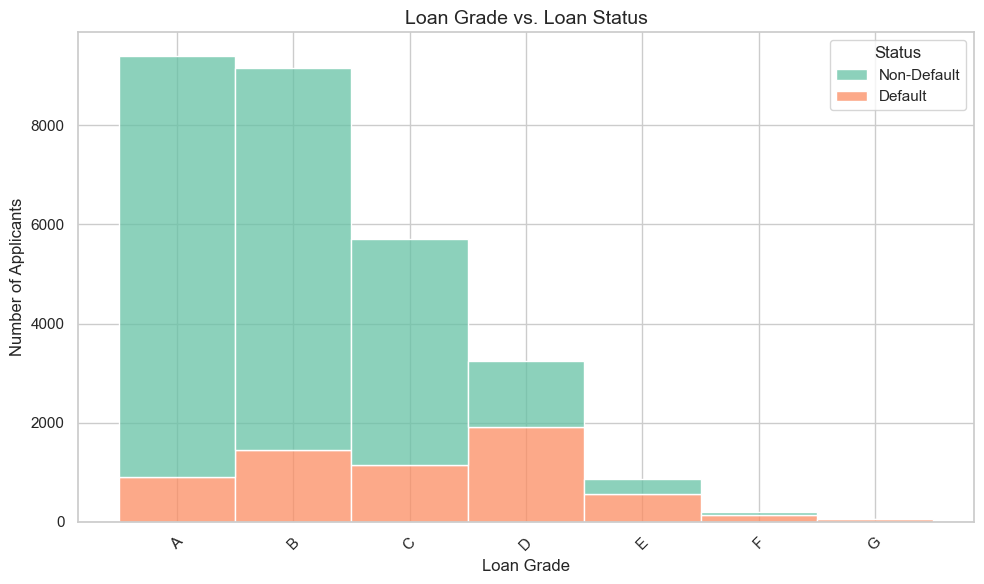

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set_theme(style="whitegrid")

# Load dataset
df = pd.read_csv("credit_risk_dataset.csv")
df.columns = df.columns.str.strip()
df = df.dropna()

# Group by loan grade and status
grade_status_group = (
    df.groupby(["loan_grade"])["loan_status"]
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
    .rename(columns={0: "Non-Default", 1: "Default"})
)

# Melt for plotting
grade_status_melted = grade_status_group.melt(
    id_vars="loan_grade",
    value_vars=["Non-Default", "Default"],
    var_name="Status",
    value_name="Count"
)

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(
    data=grade_status_melted,
    x="loan_grade",
    weights="Count",
    hue="Status",
    multiple="stack",
    palette="Set2"
)

plt.title("Loan Grade vs. Loan Status", fontsize=14)
plt.xlabel("Loan Grade")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


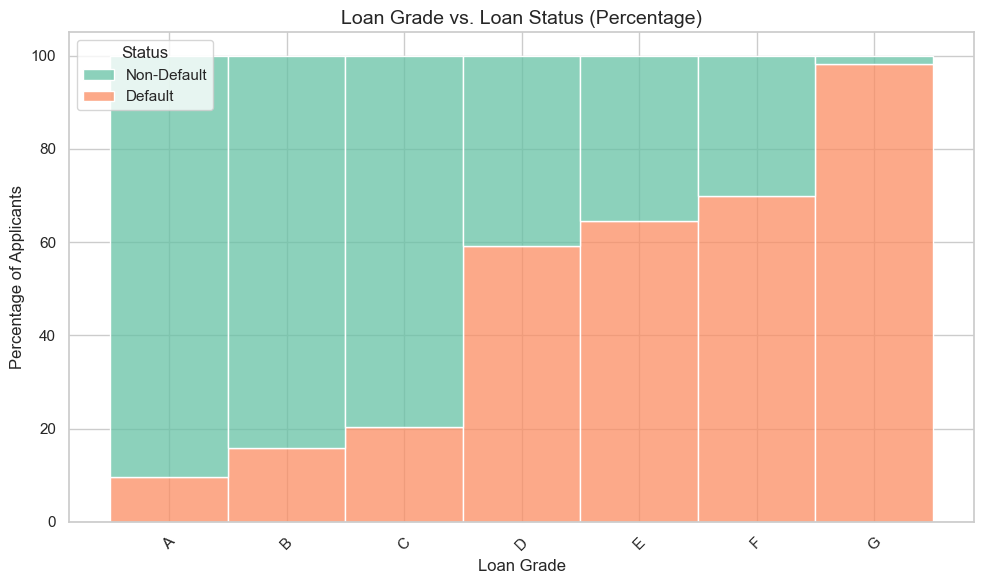

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set_theme(style="whitegrid")

# Load dataset
df = pd.read_csv("credit_risk_dataset.csv")
df.columns = df.columns.str.strip()
df = df.dropna()

# Group and count
grade_status_group = (
    df.groupby(["loan_grade", "loan_status"])
    .size()
    .reset_index(name="count")
)

# Calculate percentage within each grade
total_counts = grade_status_group.groupby("loan_grade")["count"].transform("sum")
grade_status_group["percentage"] = 100 * grade_status_group["count"] / total_counts

# Map numeric loan_status to readable labels if needed
grade_status_group["Status"] = grade_status_group["loan_status"].map({0: "Non-Default", 1: "Default"})

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(
    data=grade_status_group,
    x="loan_grade",
    weights="percentage",
    hue="Status",
    multiple="stack",
    palette="Set2"
)

plt.title("Loan Grade vs. Loan Status (Percentage)", fontsize=14)
plt.xlabel("Loan Grade")
plt.ylabel("Percentage of Applicants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


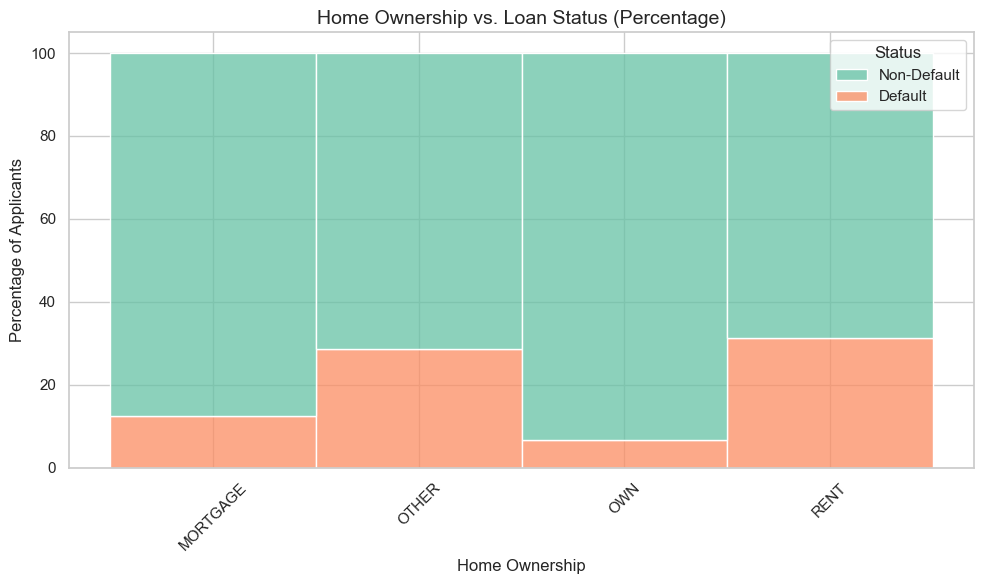

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Load and clean dataset
df = pd.read_csv("credit_risk_dataset.csv")
df.columns = df.columns.str.strip()
df = df.dropna()

# Group and count by home ownership and loan status
house_status_group = (
    df.groupby(["person_home_ownership", "loan_status"])
    .size()
    .reset_index(name="count")
)

# Compute percentages
total_counts = house_status_group.groupby("person_home_ownership")["count"].transform("sum")
house_status_group["percentage"] = 100 * house_status_group["count"] / total_counts

# Map loan status to labels
house_status_group["Status"] = house_status_group["loan_status"].map({0: "Non-Default", 1: "Default"})

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(
    data=house_status_group,
    x="person_home_ownership",
    weights="percentage",
    hue="Status",
    multiple="stack",
    palette="Set2"
)

plt.title("Home Ownership vs. Loan Status (Percentage)", fontsize=14)
plt.xlabel("Home Ownership")
plt.ylabel("Percentage of Applicants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\20200\AppData\Local\Temp\ipykernel_55552\145132737.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


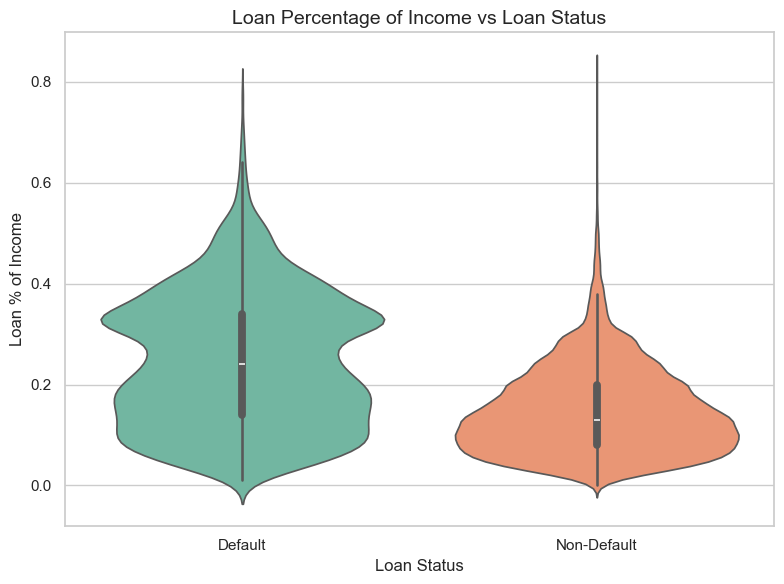

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set_theme(style="whitegrid")

# Load and clean data
df = pd.read_csv("credit_risk_dataset.csv")
df.columns = df.columns.str.strip()
df = df.dropna()

# Optional: Map status to readable labels
df['Status'] = df['loan_status'].map({0: "Non-Default", 1: "Default"})

# Plot violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df,
    x="Status",
    y="loan_percent_income",
    palette="Set2"
)

plt.title("Loan Percentage of Income vs Loan Status", fontsize=14)
plt.xlabel("Loan Status")
plt.ylabel("Loan % of Income")
plt.tight_layout()
plt.show()


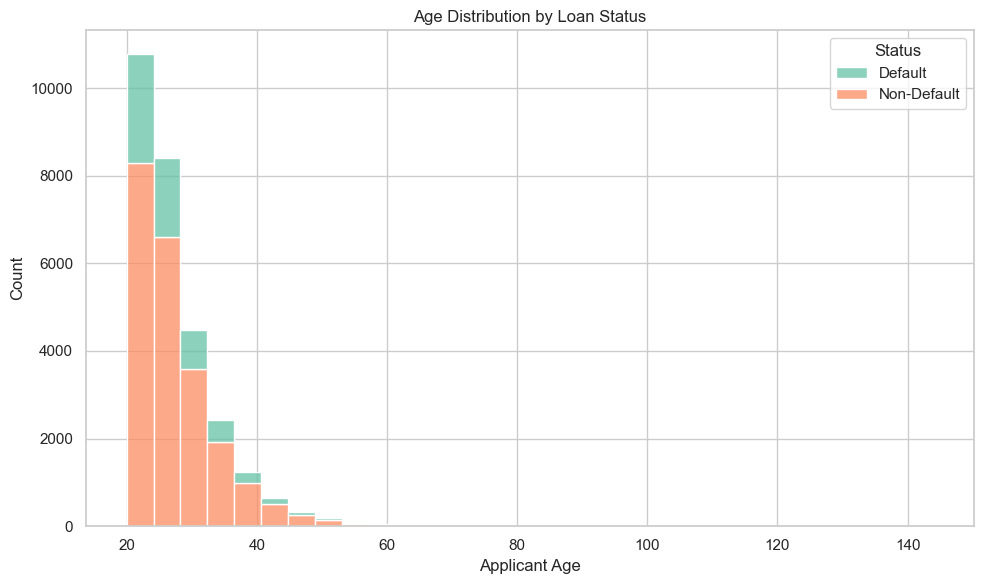

In [31]:
# Reload dataset
df = pd.read_csv("credit_risk_dataset.csv")
df.columns = df.columns.str.strip()
df = df.dropna()

# Add readable status
df["Status"] = df["loan_status"].map({0: "Non-Default", 1: "Default"})


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="person_age", hue="Status", multiple="stack", bins=30, palette="Set2")
plt.title("Age Distribution by Loan Status")
plt.xlabel("Applicant Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

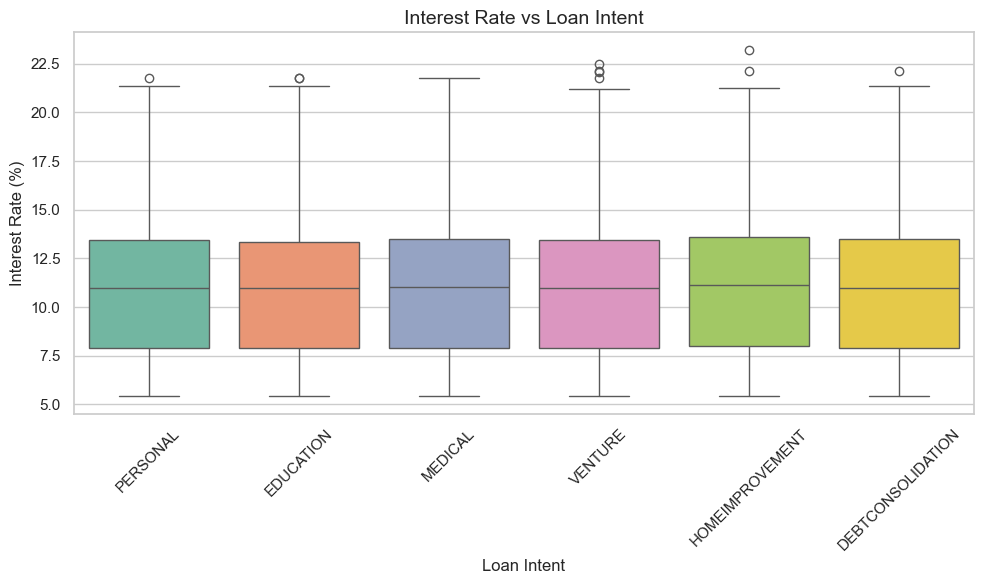

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set_theme(style="whitegrid")

# Load and clean data
df = pd.read_csv("credit_risk_dataset.csv")
df.columns = df.columns.str.strip()
df = df.dropna()

# Plot with hue=x and legend=False to suppress warning
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="loan_intent",
    y="loan_int_rate",
    hue="loan_intent",        # Required for palette to apply safely
    palette="Set2",
    legend=False              # Prevent double legends
)

plt.title("Interest Rate vs Loan Intent", fontsize=14)
plt.xlabel("Loan Intent")
plt.ylabel("Interest Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Drop rows with missing values
df_clean = df.dropna()

# Define X and y
X = df_clean.drop('loan_status', axis=1)
y = df_clean['loan_status']

# Identify categorical columns to encode
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # keep numerical columns as is
)

# Fit-transform on training and transform on test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Full pipeline with scaling
pipeline = Pipeline([
    ('encoder', preprocessor),
    ('scaler', StandardScaler())
])

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)


### Model: Logistic Regression

=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6715
           1       0.76      0.54      0.63      1877

    accuracy                           0.86      8592
   macro avg       0.82      0.75      0.77      8592
weighted avg       0.85      0.86      0.85      8592



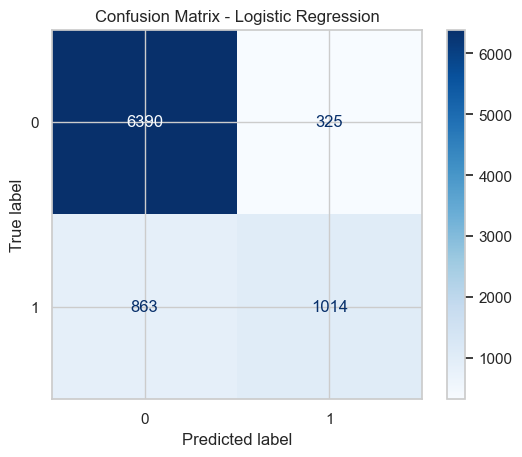

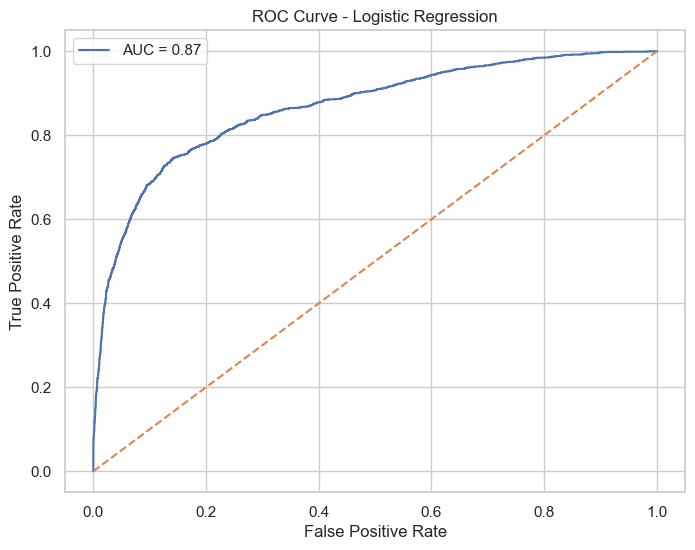

5-Fold CV ROC-AUC scores: [0.87477998 0.86531455 0.87357263 0.8703554  0.87210256]
Mean ROC-AUC: 0.8712


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Load data
df = pd.read_csv("credit_risk_dataset.csv")
df = df.dropna()  # Drop missing values

# Define target and features
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Identify categorical and numeric columns
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include=np.number).columns.tolist()

# Define the preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first"), cat_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build final pipeline
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

# Fit model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print("=== Logistic Regression Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')
print(f'5-Fold CV ROC-AUC scores: {cv_scores}')
print(f'Mean ROC-AUC: {cv_scores.mean():.4f}')


### Model: Decision Tree

=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      6715
           1       0.73      0.76      0.74      1877

    accuracy                           0.89      8592
   macro avg       0.83      0.84      0.83      8592
weighted avg       0.89      0.89      0.89      8592



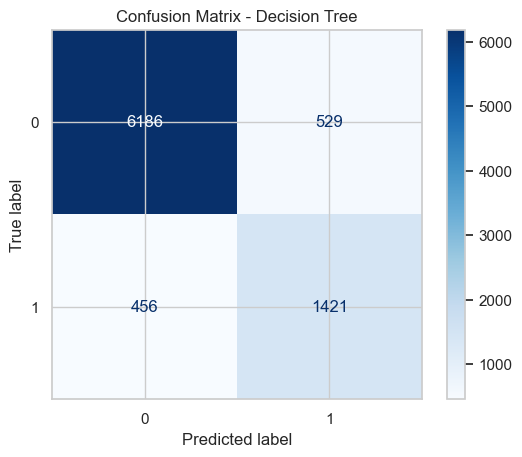

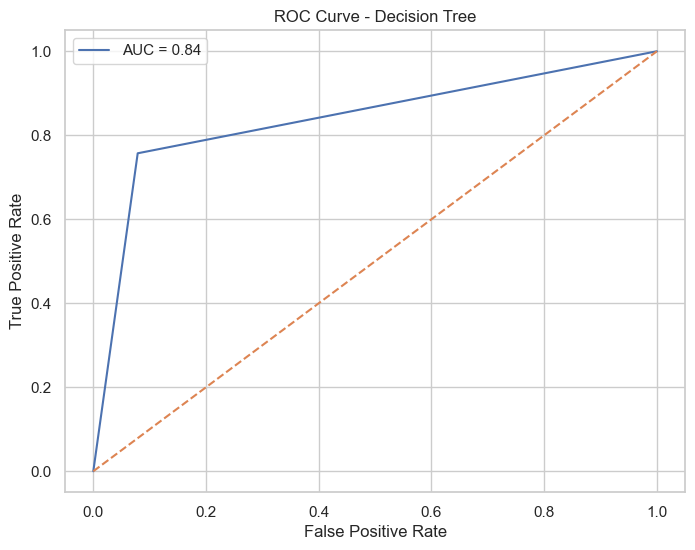

5-Fold CV ROC-AUC scores: [0.84760326 0.83359646 0.85291792 0.84292221 0.84559085]
Mean ROC-AUC: 0.8445


In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and clean data
df = pd.read_csv("credit_risk_dataset.csv").dropna()

# Split features and target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include=np.number).columns.tolist()

# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first"), cat_cols)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline with Decision Tree
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42))
])

# Fit model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("=== Decision Tree Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')
print(f'5-Fold CV ROC-AUC scores: {cv_scores}')
print(f'Mean ROC-AUC: {cv_scores.mean():.4f}')


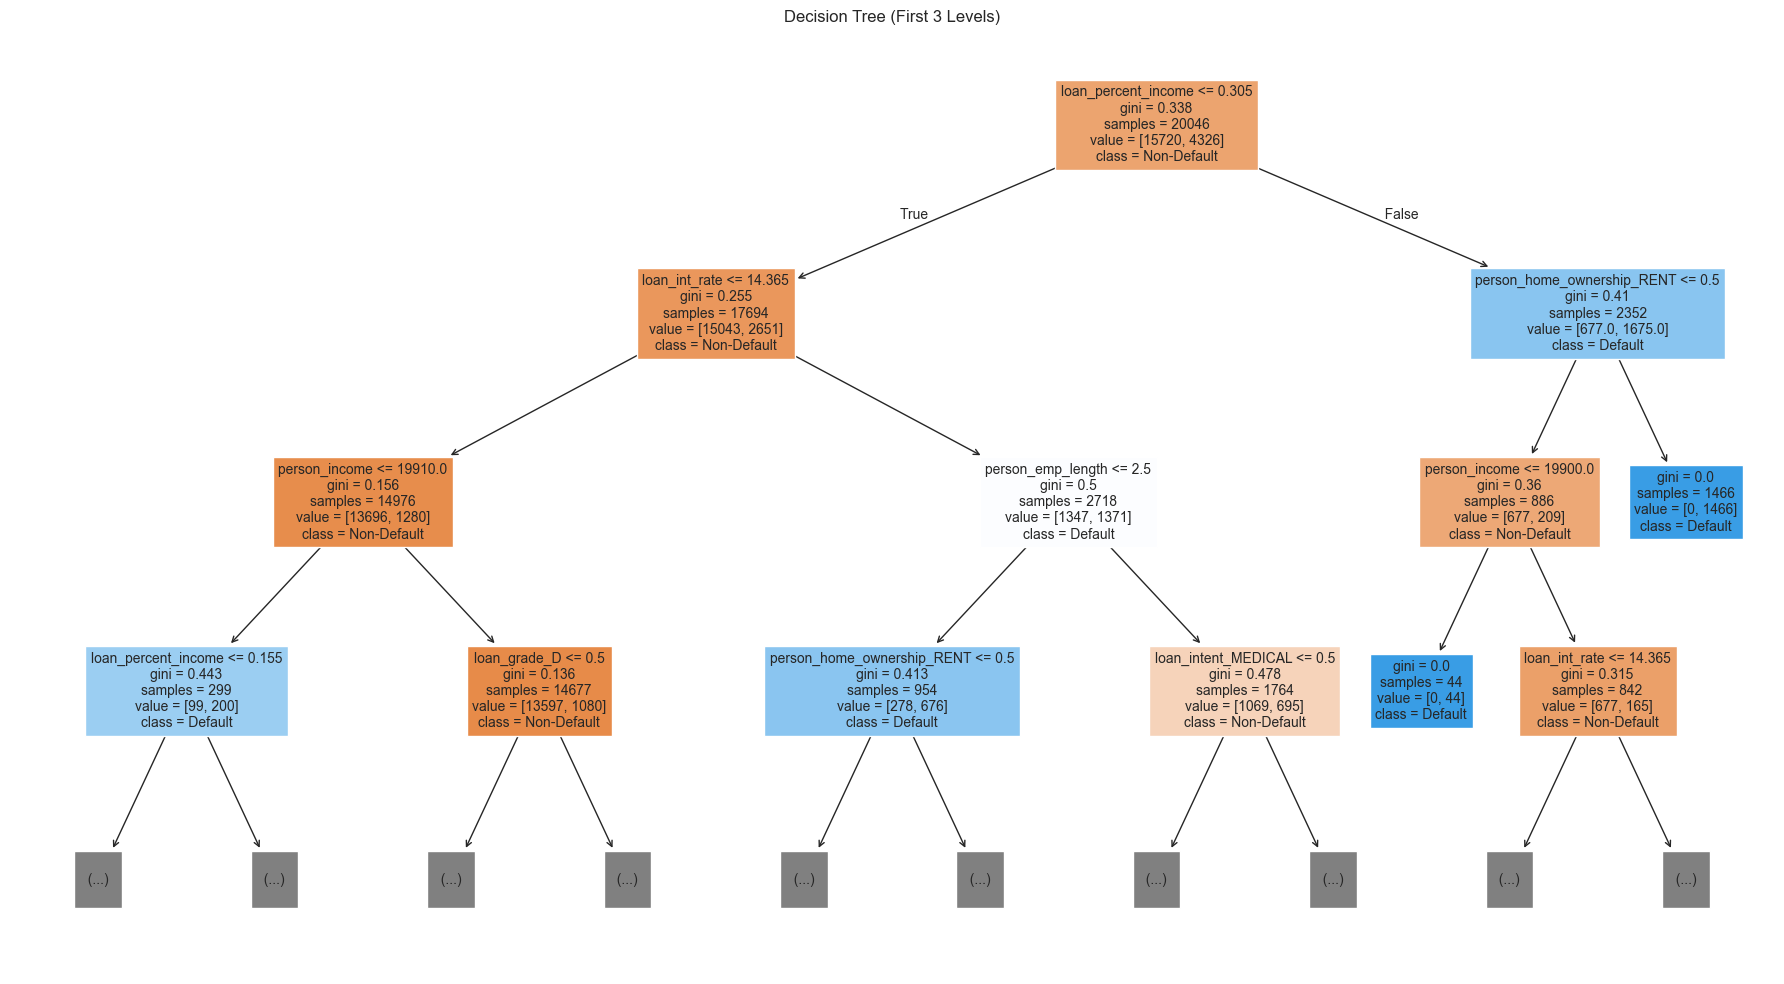

In [41]:
# Optional: Train raw model separately for tree plotting
X_encoded = pd.get_dummies(X, drop_first=True)
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

raw_tree = DecisionTreeClassifier(random_state=42)
raw_tree.fit(X_train_enc, y_train_enc)

plt.figure(figsize=(18, 10))
plot_tree(raw_tree, feature_names=X_encoded.columns, class_names=["Non-Default", "Default"], 
          filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree (First 3 Levels)")
plt.tight_layout()
plt.show()


### Model: Random Forest

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      6715
           1       0.94      0.71      0.81      1877

    accuracy                           0.93      8592
   macro avg       0.93      0.85      0.88      8592
weighted avg       0.93      0.93      0.92      8592



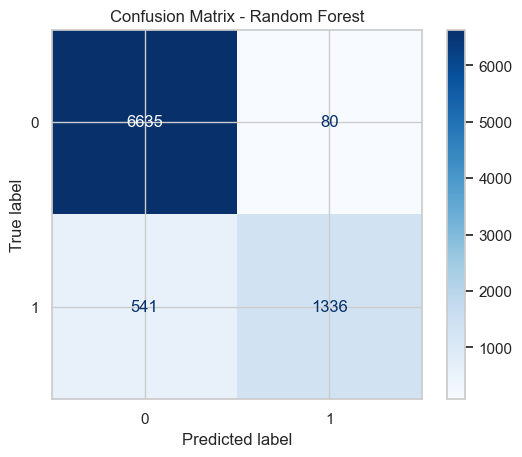

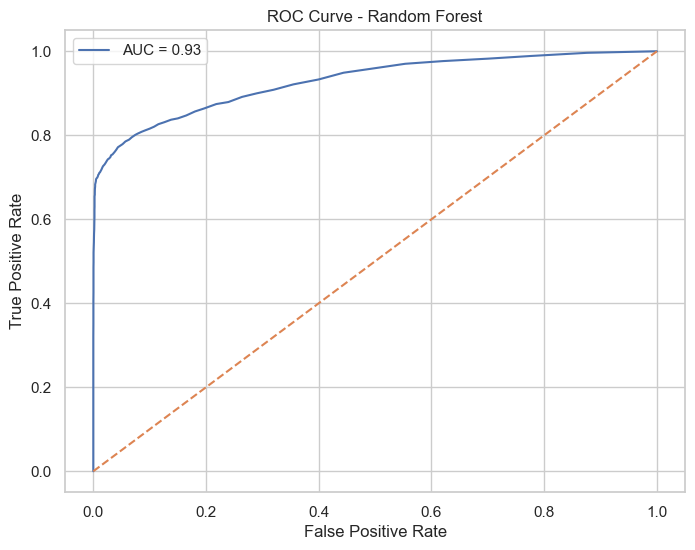

5-Fold CV ROC-AUC scores: [0.93206572 0.92764297 0.9263838  0.93555073 0.93274271]
Mean ROC-AUC: 0.9309


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("credit_risk_dataset.csv").dropna()

# Define X and y
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Identify column types
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include=np.number).columns.tolist()

# Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first"), cat_cols)
])

# Full pipeline with Random Forest
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("=== Random Forest Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Cross-validation with preprocessing
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')
print(f'5-Fold CV ROC-AUC scores: {cv_scores}')
print(f'Mean ROC-AUC: {cv_scores.mean():.4f}')


C:\Users\20200\AppData\Local\Temp\ipykernel_55552\386338103.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette="crest")


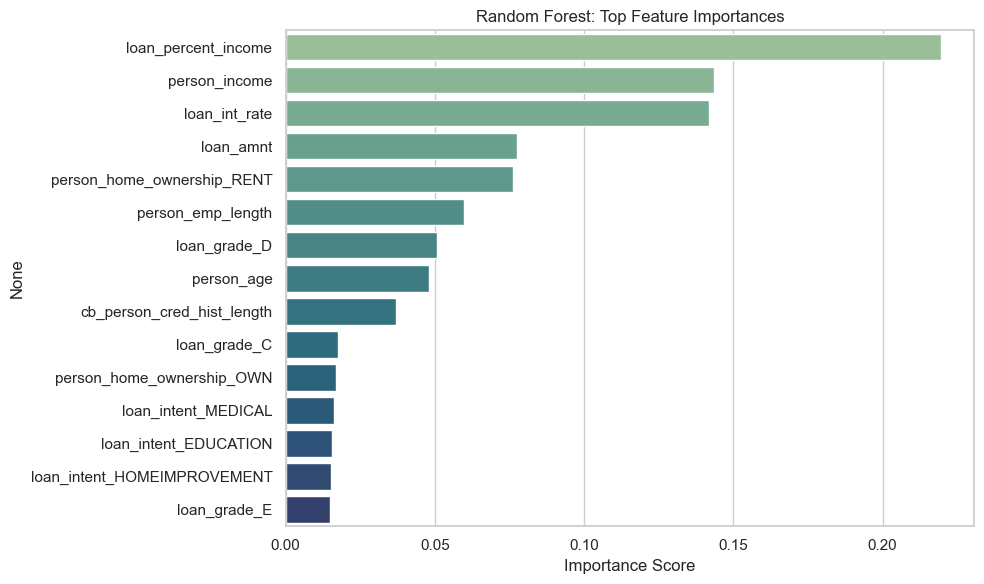

In [44]:
# Manual preprocessing for feature importance plot
X_encoded = pd.get_dummies(X, drop_first=True)
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_enc, y_train_enc)

importances = pd.Series(model_rf.feature_importances_, index=X_encoded.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index, palette="crest")
plt.title("Random Forest: Top Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


### Model: Support Vector Machine

=== SVM Classifier ===
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6715
           1       0.92      0.63      0.75      1877

    accuracy                           0.91      8592
   macro avg       0.91      0.81      0.84      8592
weighted avg       0.91      0.91      0.90      8592



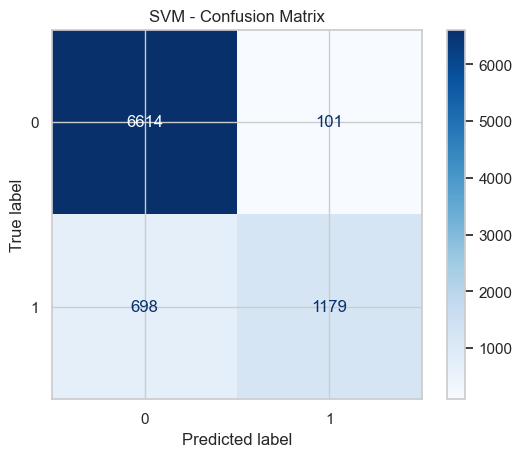

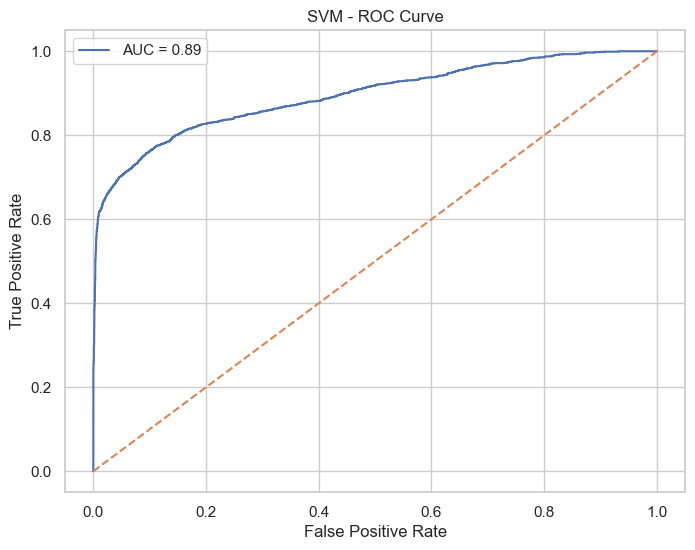

5-Fold CV ROC-AUC scores: [0.89841151 0.89390301 0.90505672 0.89996333 0.89690288]
Mean ROC-AUC: 0.8988


In [46]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Define categorical and numerical columns
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade']
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns='loan_status').columns.tolist()

# Column transformer
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop='first'), cat_cols)
])

# Split data
X = df.drop("loan_status", axis=1)
y = df["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM pipeline
pipeline_svm = Pipeline([
    ("preprocess", preprocessor),
    ("model", SVC(probability=True, random_state=42))
])

# Fit model
pipeline_svm.fit(X_train, y_train)
y_pred = pipeline_svm.predict(X_test)
y_proba = pipeline_svm.predict_proba(X_test)[:, 1]

# Evaluation
print("=== SVM Classifier ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('SVM - Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('SVM - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline_svm, X, y, cv=cv, scoring='roc_auc')
print(f'5-Fold CV ROC-AUC scores: {cv_scores}')
print(f'Mean ROC-AUC: {cv_scores.mean():.4f}')


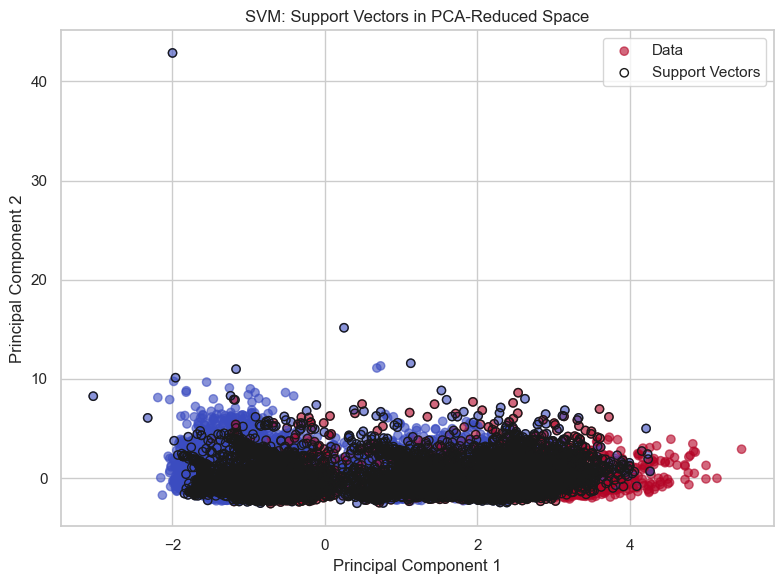

In [47]:
# PCA-reduced data for visualization
X_encoded = pd.get_dummies(X, drop_first=True)
X_scaled = StandardScaler().fit_transform(X_encoded)
X_pca_2d = PCA(n_components=2).fit_transform(X_scaled)

# Train SVM on PCA-reduced space for plotting (not used for modeling)
svm_vis = SVC(probability=True, random_state=42)
svm_vis.fit(X_pca_2d, y)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='coolwarm', alpha=0.6, label='Data')
plt.scatter(X_pca_2d[svm_vis.support_, 0], X_pca_2d[svm_vis.support_, 1], 
            facecolors='none', edgecolors='k', label='Support Vectors')
plt.title("SVM: Support Vectors in PCA-Reduced Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.tight_layout()
plt.show()


=== Ridge Classifier ===
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4487
           1       0.77      0.49      0.60      1241

    accuracy                           0.86      5728
   macro avg       0.82      0.72      0.75      5728
weighted avg       0.85      0.86      0.84      5728



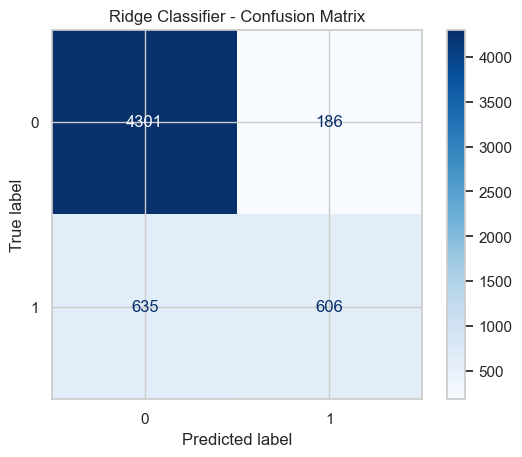

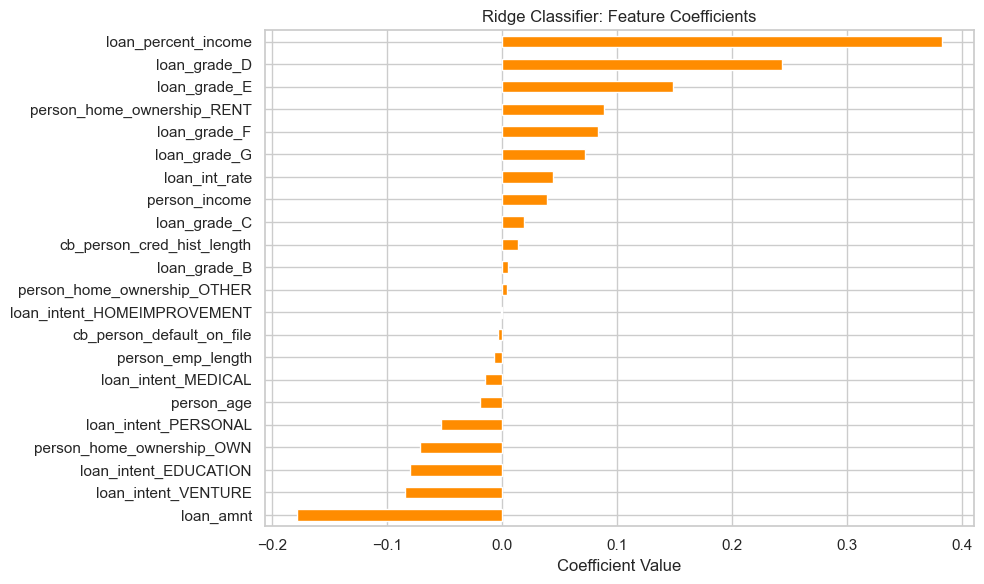

In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeClassifierCV, LassoCV, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("credit_risk_dataset.csv")
df.columns = df.columns.str.strip()
df = df.dropna()

# Encode categorical variables
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})
df_encoded = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade'], drop_first=True)

# Separate features and target
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = {}

# 1. Ridge Classifier
model_ridge = RidgeClassifierCV(cv=5)
model_ridge.fit(X_train_scaled, y_train)
y_pred = model_ridge.predict(X_test_scaled)
print("=== Ridge Classifier ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Ridge Classifier - Confusion Matrix")
plt.show()

# Cross-validation AUC (note: RidgeClassifier doesn't support predict_proba)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = cross_val_score(model_ridge, X, y, cv=cv, scoring='accuracy')
results['Ridge'] = auc_scores.mean()

coef = pd.Series(model_ridge.coef_, index=X.columns)
coef_sorted = coef.sort_values()
plt.figure(figsize=(10,6))
coef_sorted.plot(kind='barh', color='darkorange')
plt.title('Ridge Classifier: Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()



=== Gradient Boosting ===
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4487
           1       0.92      0.68      0.79      1241

    accuracy                           0.92      5728
   macro avg       0.92      0.83      0.87      5728
weighted avg       0.92      0.92      0.91      5728



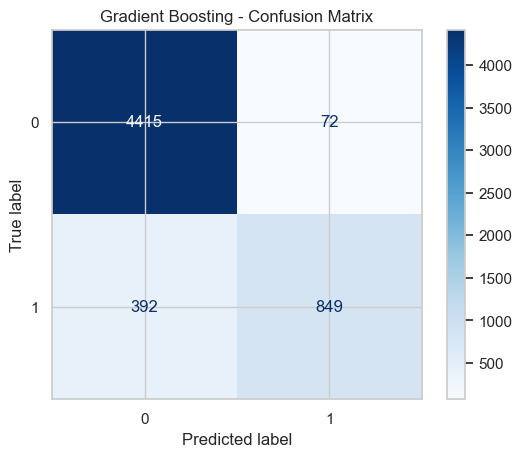

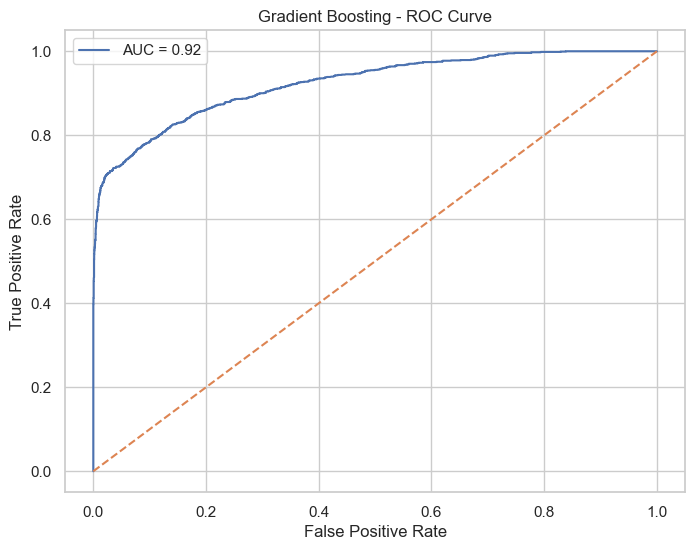

C:\Users\20200\AppData\Local\Temp\ipykernel_55552\2374259004.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette="Blues")


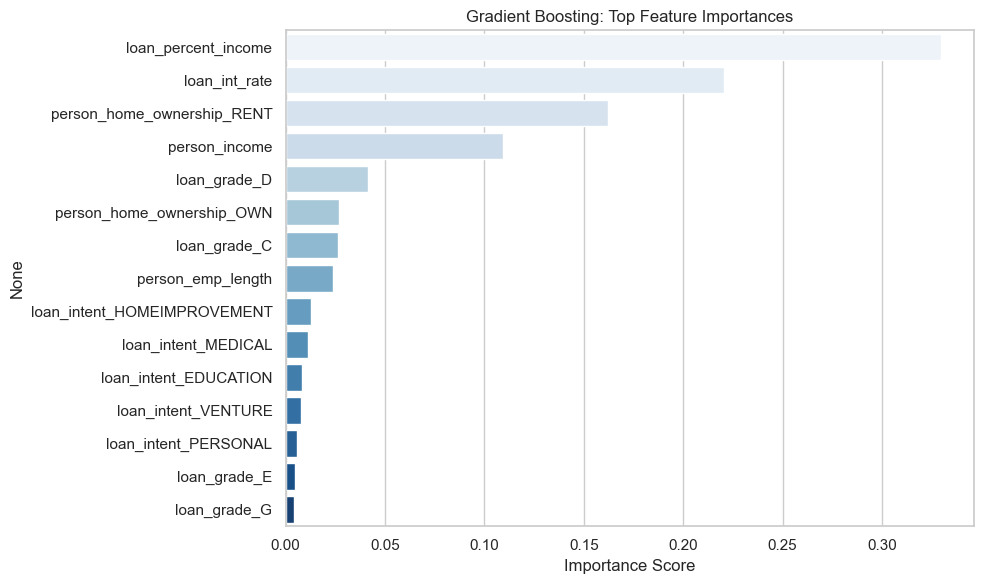

In [49]:
# 2. Gradient Boosting Classifier (Boosting)
model_gradient_boost = GradientBoostingClassifier(random_state=42)
model_gradient_boost.fit(X_train_scaled, y_train)
y_pred = model_gradient_boost.predict(X_test_scaled)
y_proba = model_gradient_boost.predict_proba(X_test_scaled)[:, 1]
print("=== Gradient Boosting ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Gradient Boosting - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

cv_scores = cross_val_score(model_gradient_boost, X, y, cv=cv, scoring='roc_auc')
results['GradientBoosting'] = cv_scores.mean()

results

importances = pd.Series(model_gradient_boost.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index, palette="Blues")
plt.title('Gradient Boosting: Top Feature Importances')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


c:\All Data\Studies\Msc Rutgers\Semester 2\Data wrengling\Project\DW_project\lib\site-packages\xgboost\training.py:183: UserWarning: [22:49:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4487
           1       0.94      0.72      0.82      1241

    accuracy                           0.93      5728
   macro avg       0.94      0.86      0.89      5728
weighted avg       0.93      0.93      0.93      5728



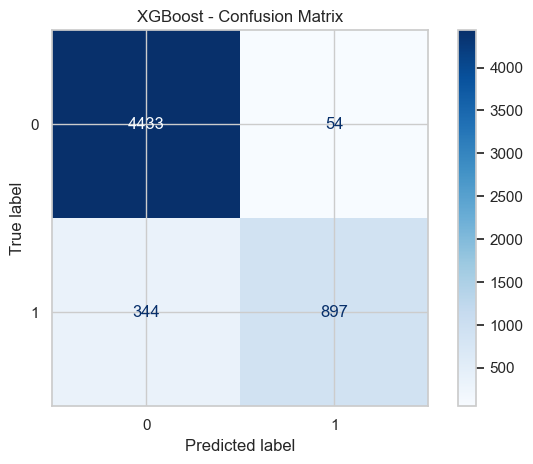

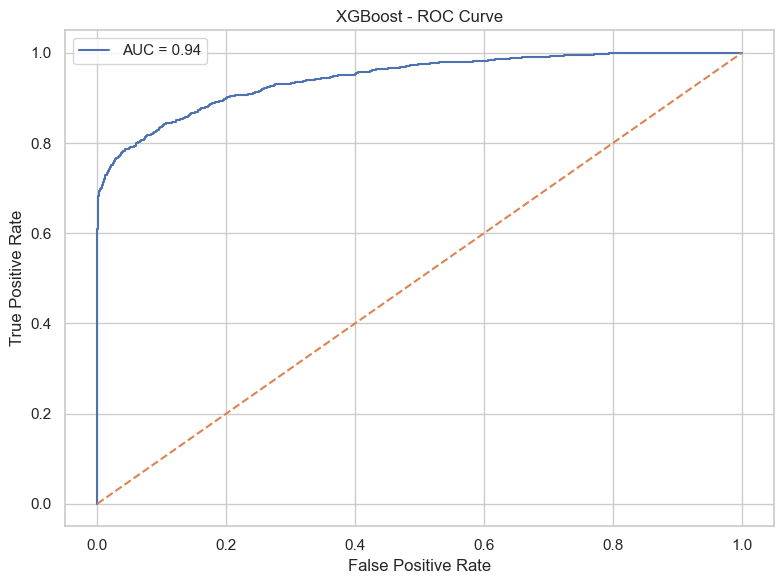

c:\All Data\Studies\Msc Rutgers\Semester 2\Data wrengling\Project\DW_project\lib\site-packages\xgboost\training.py:183: UserWarning: [22:49:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\All Data\Studies\Msc Rutgers\Semester 2\Data wrengling\Project\DW_project\lib\site-packages\xgboost\training.py:183: UserWarning: [22:49:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\All Data\Studies\Msc Rutgers\Semester 2\Data wrengling\Project\DW_project\lib\site-packages\xgboost\training.py:183: UserWarning: [22:49:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\All Data\Studies\Msc Rutgers\Semester 2\Data wrengling\Project\DW_proj

5-Fold CV ROC-AUC scores: [0.94542008 0.94582038 0.9440872  0.95122504 0.94607882]
Mean ROC-AUC: 0.9465


C:\Users\20200\AppData\Local\Temp\ipykernel_55552\3177828800.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importance, y=xgb_importance.index, palette='viridis')


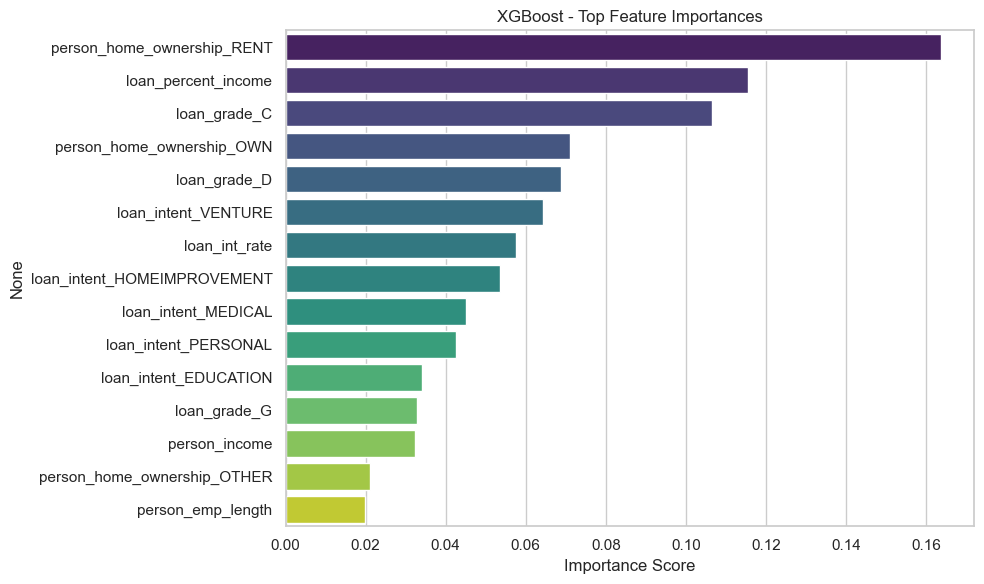

In [50]:
# Safety fix for thread error
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Load and clean dataset
df = pd.read_csv("credit_risk_dataset.csv")
df.columns = df.columns.str.strip()
df = df.dropna()
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade'], drop_first=True)

# Features and target
X = df_encoded.drop(columns=['loan_status'])
y = df_encoded['loan_status']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# XGBoost model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)

# Predictions
y_pred = model_xgb.predict(X_test)
y_proba = model_xgb.predict_proba(X_test)[:, 1]

# Classification Report
print("=== XGBoost Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test, y_test, cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('XGBoost - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_xgb, X, y, cv=cv, scoring='roc_auc')
print(f"5-Fold CV ROC-AUC scores: {cv_scores}")
print(f"Mean ROC-AUC: {cv_scores.mean():.4f}")

# Feature Importance
xgb_importance = pd.Series(model_xgb.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importance, y=xgb_importance.index, palette='viridis')
plt.title('XGBoost - Top Feature Importances')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()



  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)


ADA Boost

=== AdaBoost Classifier ===
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      5609
           1       0.76      0.60      0.67      1551

    accuracy                           0.87      7160
   macro avg       0.83      0.78      0.80      7160
weighted avg       0.87      0.87      0.87      7160



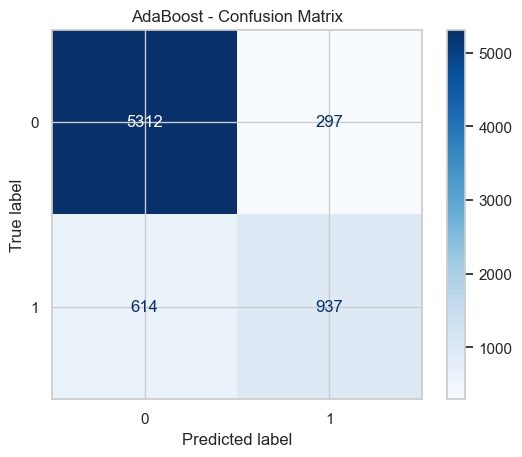

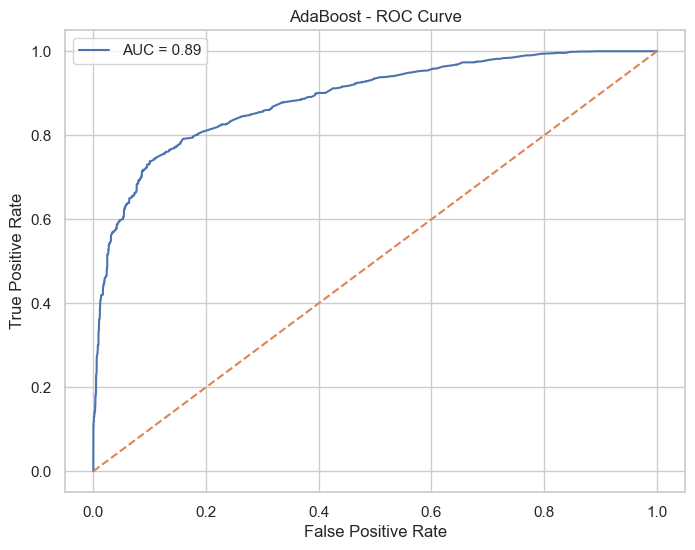

5-Fold CV ROC-AUC scores: [0.89677225 0.88551177 0.89284165 0.89320636 0.8883353 ]
Mean ROC-AUC: 0.8913


In [51]:
# Define X and y
X = df_encoded.drop(columns=['loan_status'])  # or use df if you already encoded it
y = df_encoded['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model_ada = AdaBoostClassifier(random_state=42, n_estimators=100)
model_ada.fit(X_train_scaled, y_train)

# Predictions
y_pred = model_ada.predict(X_test_scaled)
y_proba = model_ada.predict_proba(X_test_scaled)[:, 1]

# Classification report
print("=== AdaBoost Classifier ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("AdaBoost - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("AdaBoost - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_ada, X, y, cv=cv, scoring='roc_auc')
print(f'5-Fold CV ROC-AUC scores: {cv_scores}')
print(f'Mean ROC-AUC: {cv_scores.mean():.4f}')


=== Lasso + Logistic Regression ===
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5609
           1       0.77      0.53      0.63      1551

    accuracy                           0.86      7160
   macro avg       0.82      0.74      0.77      7160
weighted avg       0.86      0.86      0.85      7160



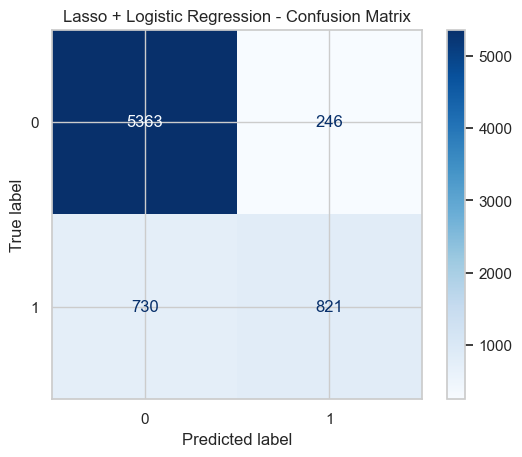

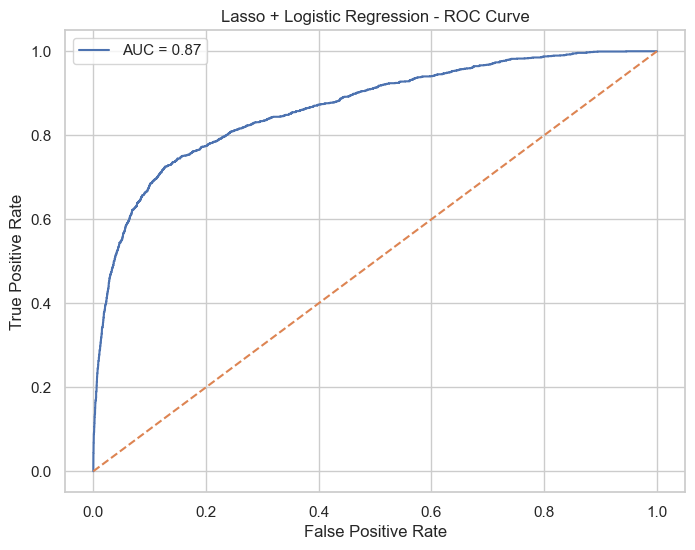

C:\Users\20200\AppData\Local\Temp\ipykernel_55552\2548890620.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=log_lasso.coef_[0], y=selected, palette='viridis')


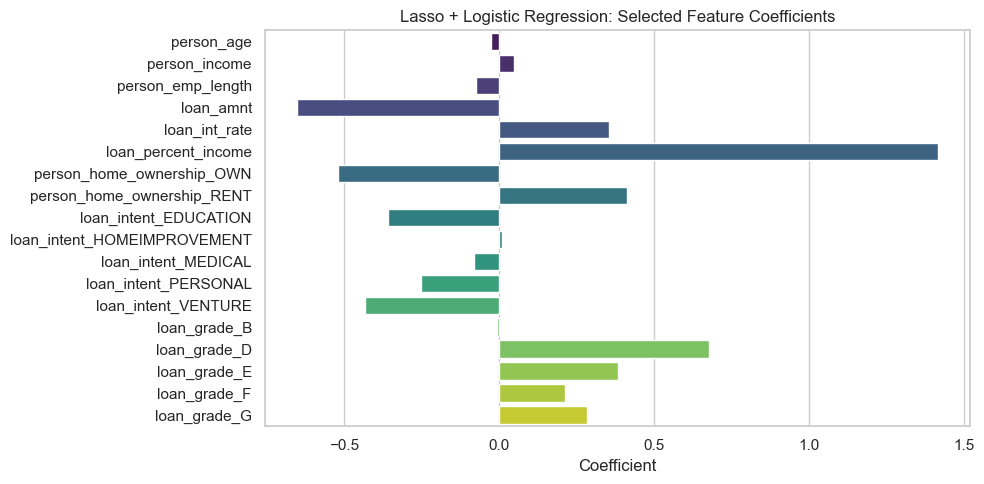

In [52]:
# Lasso for feature selection
model_lasso = LassoCV(cv=5, random_state=42)
model_lasso.fit(X_train_scaled, y_train)

# Identify non-zero coefficients (selected features)
selected_features = np.where(model_lasso.coef_ != 0)[0]
X_train_lasso = X_train_scaled[:, selected_features]
X_test_lasso = X_test_scaled[:, selected_features]

# Logistic Regression on selected features
log_lasso = LogisticRegression(max_iter=1000)
log_lasso.fit(X_train_lasso, y_train)
y_pred = log_lasso.predict(X_test_lasso)
y_proba = log_lasso.predict_proba(X_test_lasso)[:, 1]

# Evaluation
print("=== Lasso + Logistic Regression ===")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Lasso + Logistic Regression - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Lasso + Logistic Regression - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

selected = np.array(X.columns)[model_lasso.coef_ != 0]
plt.figure(figsize=(10, 5))
sns.barplot(x=log_lasso.coef_[0], y=selected, palette='viridis')
plt.title("Lasso + Logistic Regression: Selected Feature Coefficients")
plt.xlabel("Coefficient")
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Apply PCA to scaled features
model_pca = PCA(n_components=10)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_pca = model_pca.fit_transform(X_scaled)

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(X_pca)

# Cluster Profiling using original features
cluster_profile = df.groupby('cluster')[[
    'person_income', 'loan_amnt', 'loan_int_rate',
    'cb_person_cred_hist_length', 'loan_status'
]].mean()

print("=== Cluster Profiles (Means by Group) ===")
display(cluster_profile)


=== Cluster Profiles (Means by Group) ===


,person_income,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_status
cluster,,,,,
0,61620.601725,9137.240736,10.226364,5.878583,0.209508
1,64116.635024,9335.354356,10.113520,5.030342,0.142393
2,66606.774506,10433.236399,14.607787,5.964982,0.388101
3,69577.599826,9421.247822,9.151265,5.945732,0.125784


Standardize Data and Run PCA

 X shape: (28638, 22)
 y shape: (28638,)


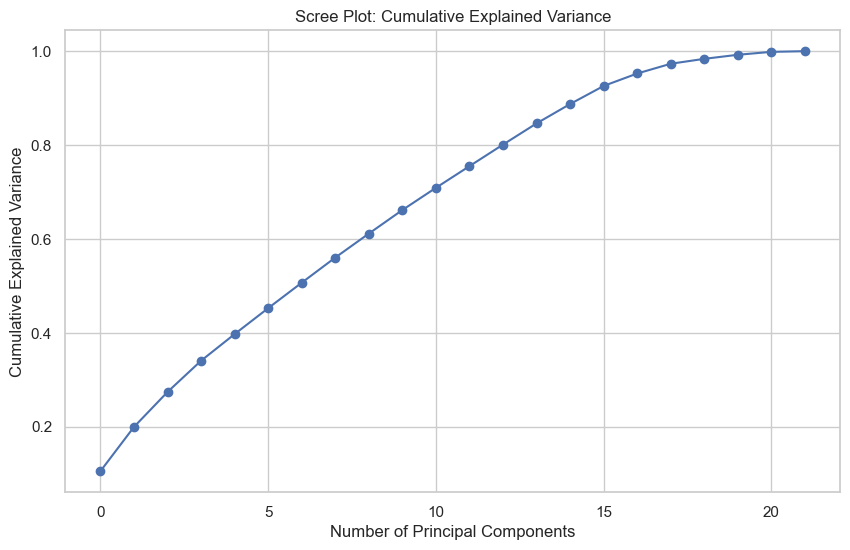

90% variance is explained by the first 16 components.
95% variance is explained by the first 17 components.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df_raw = pd.read_csv("credit_risk_dataset.csv")
df_raw.columns = df_raw.columns.str.strip()

# Drop missing values
df_raw = df_raw.dropna()

# Encode binary categorical feature
df_raw['cb_person_default_on_file'] = df_raw['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

# One-hot encode remaining categorical features
df_encoded = pd.get_dummies(df_raw, columns=['person_home_ownership', 'loan_intent', 'loan_grade'], drop_first=True)

# Separate features and target
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Print shape to verify data is not empty
print(" X shape:", X.shape)
print(" y shape:", y.shape)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratios
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Scree Plot: Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# How many components explain 90% and 95%
for threshold in [0.90, 0.95]:
    num_components = np.argmax(cumulative_variance >= threshold) + 1
    print(f"{threshold*100:.0f}% variance is explained by the first {num_components} components.")


The first component explains about a quarter of the total variance.

Together, the first two components capture almost half the dataset's variance.

Top 3 components capture nearly two-thirds of the data’s variance.

With just 5 components, you already explain 94% of total variance, which is excellent for dimensionality reduction.

All components together explain the full variance (as expected).

Principal Component Regression (PCR)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6715
           1       0.74      0.48      0.58      1877

    accuracy                           0.85      8592
   macro avg       0.80      0.72      0.75      8592
weighted avg       0.84      0.85      0.84      8592



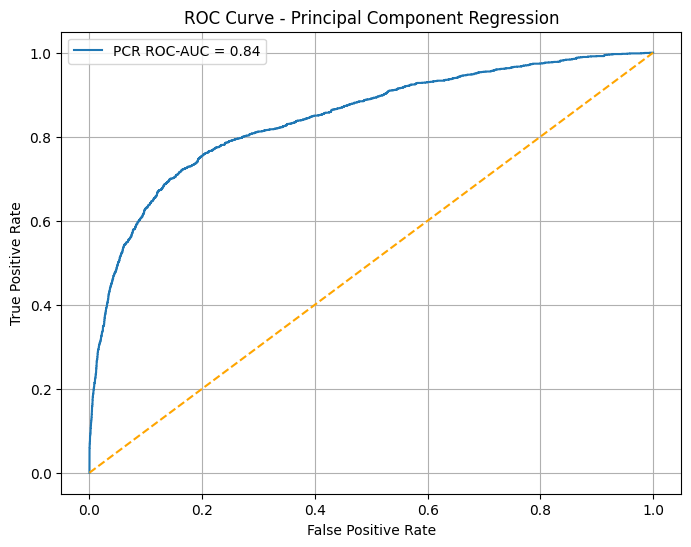

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pcr, y, test_size=0.3, random_state=42)

# Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Classification report
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'PCR ROC-AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='orange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Principal Component Regression')
plt.legend()
plt.grid(True)
plt.show()


ROC-AUC = 0.83

This means your model has a strong overall ability to discriminate between defaulters and non-defaulters.

AUC of 0.83 suggests that, in 83% of random cases, the model ranks a randomly chosen defaulter higher than a non-defaulter.

The curve stays well above the diagonal “random guess” line, confirming the model performs much better than chance.

Table:
68% of predicted defaulters were actually defaulters.
Only 39% of actual defaulters were correctly identified.
Low F1 for defaulters due to low recall.
Significant class imbalance.

Skipping SVM due to error: 'SVC' object has no attribute 'support_vectors_'
Skipping Lasso regression due to error: 'LassoCV' object has no attribute 'decision_function'


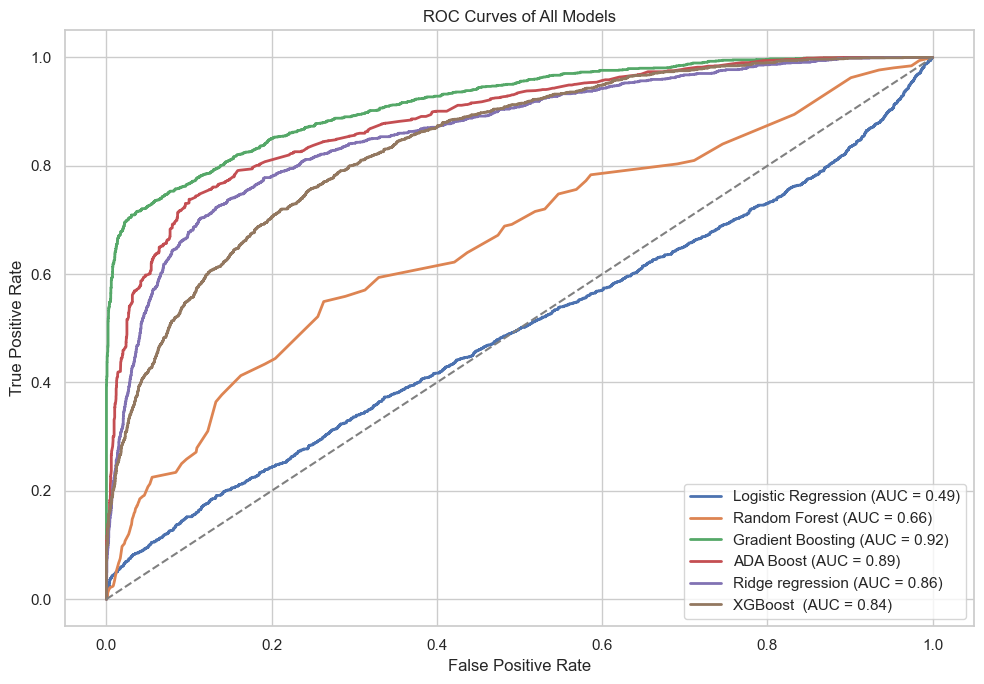

In [54]:
plt.figure(figsize=(10, 7))

for name, model in models.items():
    try:
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_scores = model.decision_function(X_test_scaled)
        
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")
    except Exception as e:
        print(f"Skipping {name} due to error: {e}")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves of All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


K-Means Clustering

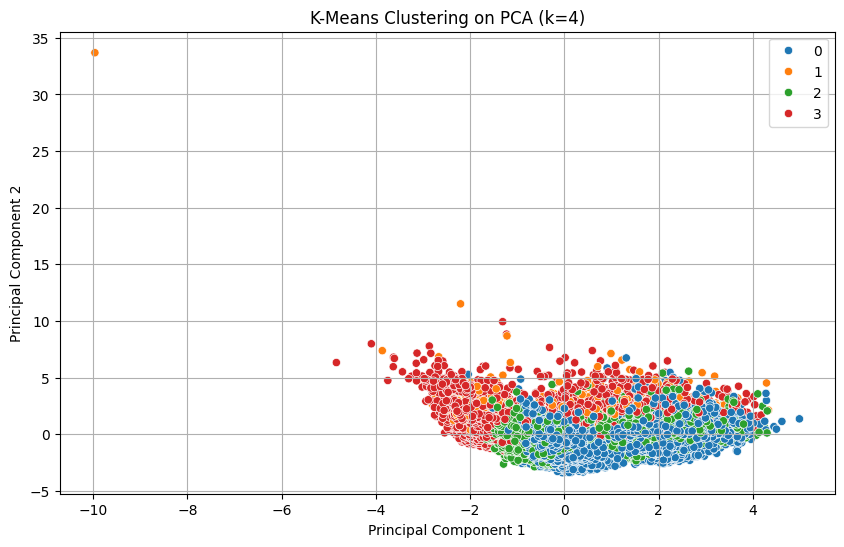

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pcr)

# Plot PCA with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pcr[:, 0], y=X_pcr[:, 1], hue=clusters, palette='tab10')
plt.title('K-Means Clustering on PCA (k=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


orange : Largest and most spread-out group. These points cover the widest PCA range and likely represent applicants with diverse financial features. May include both low and high-risk profiles.

green : Compact and tight cluster — may represent a specific applicant profile (e.g., low-income, low-loan amount borrowers) with more uniformity.

red : Relatively small and localized. Could represent mid-risk borrowers or a specific loan intent group.

blue : Densely packed and overlaps somewhat with Cluster 3. Might reflect applicants with high credit history length or consistent income patterns.

Hierarchical Clustering (Dendrogram)

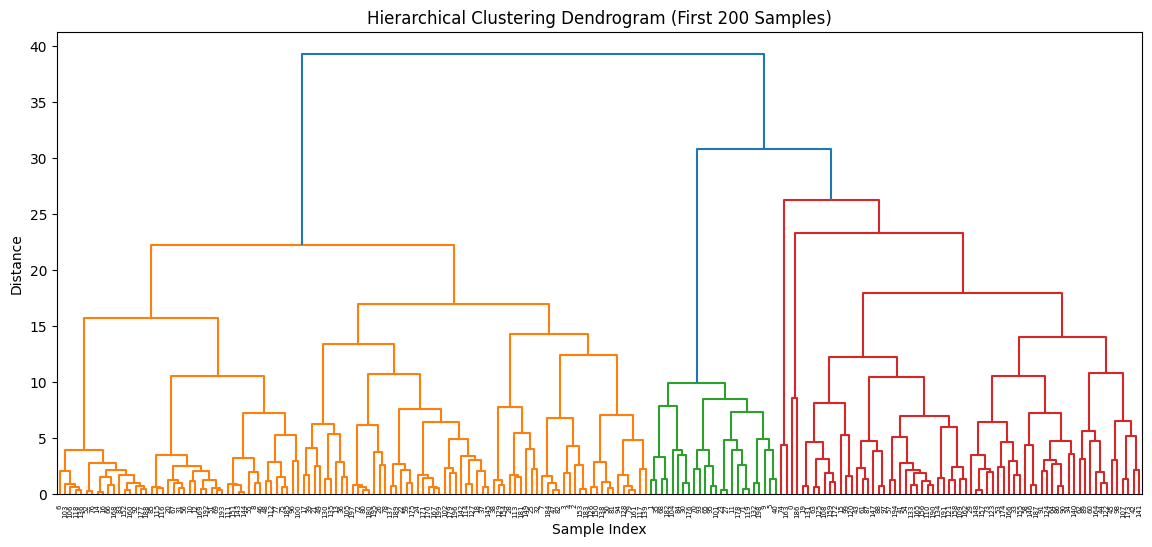

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Use first 200 samples for dendrogram
Z = linkage(X_pcr[:200], method='ward')

# Plot dendrogram
plt.figure(figsize=(14, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (First 200 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


Many small clusters merge early (bottom) with short distances — indicating there are tightly grouped points.

The big vertical jumps (especially around height 30–55) indicate major cluster divisions — this suggests 3 to 5 meaningful clusters may be a natural choice.

If you cut the dendrogram horizontally at height ≈ 30–40, you would likely get around 4 main clusters, which aligns with your earlier K-Means model.